# **Lab 2: Transfer Learning & Transformers**
    - Salissa Hernandez
    - Juan Carlos Dominguez
    - Leonardo Piedrahita
    - Brice Danvide

### Details
You may choose to perform classification on any sequential dataset or image dataset you like using a pre-trained transformer. For example, you could choose a text dataset. You could also choose an image dataset with which you plan to use patches of the images as a sequence. Or time-series data. It is recommended to select a many-to-one dataset, where many items in a sequence are used to classify the sequence into one distinct category. Several examples are given below that might be possible. However, it is up to you to choose which data you would like to analyze. A general guideline rubric is also given.

When selecting a dataset, you should try to choose data that is relevant to your research. If you cannot do this, the following is a good guide for datasets about sentiment classification, which would work well for this lab: https://research.aimultiple.com/sentiment-analysis-dataset/Links to an external site. 

For selecting pre-trained transformer models, a number of possible lists have been curated, such as: 

- Hugging Face Text transformers: https://huggingface.co/transformers/v3.3.1/pretrained_models.html 
- Hugging Face ViT: https://huggingface.co/docs/transformers/model_doc/vit
- Keras text Transformers: https://keras.io/guides/keras_nlp/transformer_pretraining/
- Keras ViT: https://github.com/faustomorales/vit-keras
- Or any other transformer you want to use as a base model. 

# **Table of Contents**
- [1. Dataset Overview](#1-dataset-overview)
- [2. Foundational Model](#2-foundational-model-to-transfer-learn-from)
- [3. Dataset Processing](#3-dataset-processing--preparation)
- [4. Dataset Splitting](#4-dataset-splitting)
- [5. Baseline Model Training](#5-baseline-model-training-from-scratch)
- [6. Foundational Model Training](#6-foundational-model-training-with-transfer-learning)
- [7. Fine Tuning Foundational Model](#7-fine-tuning-foundational-model)
- [8. Results](#8-results-statistical-comparisons--visualizations)

# **Dataset**
- https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/data
- https://ai.stanford.edu/~amaas/data/sentiment/

# **1. Dataset Overview**
[2.0 points]
- What is the classification task? 
    - What business case does it solve? 
    - Is this multi-task? Explain.
- What is the feature data? 
    - Who collected the data? Why? When? 
    - Is the data multi-modal?
- What evaluation criteria will you be using and why? 
    - Why does this support the business case?

### **1.1 Classification Task**
- The dataset used for this lab is the **IMDB Movie Reviews Dataset**, which is designed for a **binary classification task**. The goal is to classify movie reviews as either **positive** or **negative** based on the textual content of the review. This task falls under the domain of **sentiment analysis**, a subfield of Natural Language Processing (NLP) that involves extracting and interpreting emotions, opinions, or sentiments from text data.

- We believe this dataset is appropriate for our analysis for the following reasons:
   - 1. Each movie review is a sequence of text labeled with a single sentiment (positive or negative), which fits the many-to-one paradigm, where multiple inputs (in this case words in the review) are used to predict one ouput (the sentiment).
   - 2. As a text-based dataset, it naturally aligns with the strengths of transformer models that process sequences of tokens. Pre-trained transformers like BERT are designed to capture the context within sequences, which is what we'll be using in our sentiment classification. 
   - 3. The dataset contains 50,000 reviews, which provides sufficient amount of data for training and validation, but not so much data where it overloads memory capacity.

#### **1.1.1 Business Case**
- The **business case** for sentiment analysis in this context is highly relevant to various industries, including entertainment, marketing, and customer experience management. Streaming services, movie studios, and review aggregators can utilize sentiment analysis to understand audience reception, improve content recommendations, and make data-driven decisions regarding movie production and marketing strategies. An accurate sentiment classification model enables businesses to analyze large volumes of customer feedback efficiently, reducing the need for manual review.

#### **1.1.2 Is the data multi-task?**
- This is **not a multi-task learning problem**, as the model is trained to perform a **single classification task**—predicting the sentiment of a given movie review. A multi-task learning approach would involve solving multiple related problems simultaneously, such as predicting both sentiment polarity (positive/negative) and movie genre classification or review helpfulness rating. Since the dataset strictly focuses on sentiment classification, it remains a single-task learning problem.

### **1.2 What is the Feature Data?**
- The dataset consists of **text-based reviews** paired with their corresponding sentiment labels (positive or negative). Each review represents a sample in the dataset, and the feature data consists solely of the textual content of the review.

#### **1.2.1 Dataset Collection**
- The dataset was originally collected from **IMDB (Internet Movie Database)** as part of research efforts to advance the field of sentiment analysis and machine learning. It was compiled and released by **Andrew Maas and colleagues at Stanford University in 2011** to serve as a benchmark for evaluating the performance of NLP models in sentiment classification tasks (source: https://ai.stanford.edu/~amaas/data/sentiment/). The dataset is widely used in academic research and applied machine learning projects.

#### **1.2.2 Is the Data Multi-Modal?**
- This data is **not multi-modal**, as it only contains a **single modality**—text. Multi-modal datasets contain multiple types of data sources, such as text, images, audio, or video. For example, a truly multi-modal dataset in this domain might include movie posters (images), trailers (videos), or voice recordings of reviews (audio) in addition to the textual reviews. Since this dataset solely relies on written reviews, it is strictly a text-based, single-modal dataset.

### **1.3 Evaluation Criteria**
In this analysis, we are evaluating the performance of our sentiment classification models from multiple dimensions to ensure robustness and reliability in real-world applications. We will focus on **accuracy**, **F1-Score**, and model efficiency (including convergence time), considering both **false positives** and **false negatives** during evaluation.

#### **1.3.1 Accuracy and Loss Evaluation**  
The **accuracy** of the model will be assessed throughout the training process by monitoring the training and testing datasets. This provides a clear indication of how well the model is performing as it learns from the data. We will specifically examine:
- **Training Accuracy**: Reflects how well the model fits to the training data.
- **Test Accuracy**: Shows how well the model generalizes to unseen data.

The **loss** function will also be tracked during the training process. Loss measures the error between the predicted outputs and the actual outputs, with lower values indicating a better fit. By comparing training and test accuracy alongside loss, we can determine whether the model is:
- **Converging Properly**: If both accuracy and loss show steady improvement over time, it indicates the model is learning effectively.
- **Overfitting**: If training accuracy is much higher than test accuracy, it may indicate that the model is overfitting, capturing noise in the data rather than generalizable patterns.

#### **1.3.2 Convergence Time (Model Efficiency)**  
The time it takes for the model to converge (i.e., to reach its optimal state) will be considered an important evaluation criterion. Since training models on large datasets can be computationally expensive, assessing convergence time provides insights into the model's **efficiency**. Convergence time may vary depending on the complexity of the model and the computational resources available.

We will account for differences in processor performance across different machines used for evaluation, but we aim to ensure that models are trained efficiently without compromising performance. For business applications, this is crucial because **faster convergence times** contribute to the **scalability** of the model, making it viable for deployment in high-traffic environments. Faster training processes also lead to **cost savings** by reducing the computational resources required and increasing overall efficiency, which is especially important for companies looking to scale their operations.

Hardware Constraints
 - Baseline Model (MLP): Can be trained on a CPU with moderate efficiency. It has fewer parameters and lower memory requirements, making it feasible for low-resource environments.
 - Transformer Model: Requires a GPU or TPU for practical training times, especially for fine-tuning. Training transformers on a CPU would be significantly slower and may not converge within a reasonable time.
- Memory Considerations: Large transformer models require substantial VRAM. Lower-end GPUs may require gradient accumulation or smaller batch sizes to avoid memory crashes.

To balance performance and computational feasibility, we will monitor both convergence time and resource usage, ensuring that the model is efficient and practical for deployment.

#### **1.3.3 F-Score Analysis and Cohen’s d (Effect Size Evaluation)**  
Once the models have completed their training, we will use statistical analysis to compare their performance. Specifically, we will use **Cohen’s d** as a measure of effect size to quantify the **practical significance** of differences between models.  

##### **Cohen’s d for Model Comparison**  
Since our models are trained and evaluated on the **same dataset**, their performance metrics (e.g., precision, recall, F1-score) can be directly compared. However, rather than solely relying on hypothesis testing (e.g., p-values), **Cohen’s d provides a standardized measure of the magnitude of performance differences** between models.  

##### **Why Cohen’s d?**  
- Unlike traditional statistical significance tests (e.g., paired t-tests), which focus on whether differences exist, **Cohen’s d tells us how large those differences are**.  
- This is especially important in **machine learning experiments**, where small differences in performance may be statistically significant but **not practically meaningful**.  
- **A large Cohen’s d value indicates a meaningful improvement**, whereas a small value suggests the models perform similarly.  

We define Cohen’s d as follows:  
$$
d = \frac{\bar{X}_1 - \bar{X}_2}{s_p}
$$  
where:  
- \( \bar{X}_1 \) and \( \bar{X}_2 \) are the mean scores of the two models,  
- \( s_p \) is the pooled standard deviation, ensuring a fair comparison.  

To interpret Cohen’s d:  
- **d ≈ 0.2** → Small effect (minimal practical difference)  
- **d ≈ 0.5** → Medium effect (moderate difference)  
- **d ≥ 0.8** → Large effect (strong practical significance)  

By using **Cohen’s d for precision, recall, and F1-score comparisons**, we ensure that our evaluation accounts for **both statistical and practical significance**, offering deeper insights into how much **fine-tuning or model architecture impacts real-world performance**.  

##### **F-Score Analysis for Model Performance**  
While accuracy provides an overall measure of correctness, it does not account for **imbalanced classifications**. To get a more balanced view of model performance, we will use the **F1-Score**, which considers both **Precision** and **Recall**:  

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$  

The **F1-Score** ensures that both **false positives** and **false negatives** are considered, making it particularly useful in sentiment classification where misclassifications impact user experience.  

By integrating **Cohen’s d for effect size measurement** with **F1-Score analysis for classification performance**, we ensure a **rigorous and practically meaningful comparison** of our models.


#### **1.3.4 Precision, Recall, and F1-Score Evaluation**  
As this is a binary classification task, we are concerned with both **False Positives** and **False Negatives**. False Positives occur when a negative review is incorrectly classified as positive, and False Negatives occur when a positive review is mistakenly classified as negative. These errors can have a substantial impact on the user experience, as described below:

- **False Positives**: If a negative review is classified as positive, users may be misled into thinking a movie is worth watching, potentially resulting in a negative experience.
- **False Negatives**: If a positive review is classified as negative, users may miss out on a film they would have enjoyed, affecting their satisfaction with movie recommendations.

To mitigate these issues, we will evaluate both **Precision** and **Recall**:
- **Precision** measures the proportion of positive predictions that are correct, focusing on minimizing False Positives.
- **Recall** measures the proportion of actual positive reviews that are correctly identified, addressing False Negatives.

We will optimize for the **F1-Score**, which provides a balanced measure of both Precision and Recall. The F1-Score is particularly important because it balances the trade-off between these two metrics and gives a comprehensive view of model performance. Maximizing the F1-Score will ensure that the model is effective in both identifying true positive reviews and minimizing misclassifications.

#### **1.3.5 Business Case Relevance and Model Impact**  

The evaluation criteria used in the sentiment analysis model are deeply aligned with the core business objectives, particularly the need for accurate, reliable, and efficient sentiment classification for movie reviews. These objectives serve as the foundation for driving business decisions and improving customer-facing applications within the entertainment and media industries, as well as enhancing user experience on streaming platforms. 

##### **1.3.5.1 Accuracy: Ensuring Reliable Sentiment Classification**  
**Accuracy** plays a pivotal role in this business case, as it reflects the model’s ability to predict whether a review expresses a positive or negative sentiment. For companies in the entertainment industry, the ability to classify reviews accurately directly impacts the efficiency of content recommendation systems. If the system accurately identifies positive reviews, it can recommend movies to viewers that match their preferences, increasing viewer satisfaction and engagement. Conversely, correctly identifying negative reviews ensures that users are not misled into watching movies they may not enjoy, enhancing the overall user experience. From a business perspective, this leads to increased customer retention and more personalized experiences. Accurate sentiment classification also helps reduce manual efforts in curating and interpreting reviews, saving time and resources, and allowing businesses to scale operations more effectively.

##### **1.3.5.2 Precision and Recall: Minimizing Misleading Predictions**  
**Precision** and **Recall** are critical evaluation metrics that ensure the model's performance is balanced and that both positive and negative reviews are correctly classified. Precision is important in this context because it measures the accuracy of the positive sentiment predictions. In other words, if the model classifies a review as positive, how often is it really a positive review? In the business case, if a positive review is misclassified as negative (a false negative), potential customers may be discouraged from watching a movie they would have otherwise enjoyed. This could lead to a loss in viewership and engagement, or even unsubscribing, which is detrimental to streaming services or movie studios that rely on maximizing content visibility. 

On the other hand, **Recall** measures the model’s ability to capture all the relevant positive (or negative) reviews. If a model misses too many positive reviews (false negatives), it could result in customers missing out on great content that aligns with their preferences. In a competitive market, this could lead to reduced customer satisfaction and potentially lost revenue opportunities.

By optimizing both precision and recall, businesses can strike a balance between providing accurate recommendations and minimizing misleading predictions. This ensures customers receive relevant movie suggestions based on their tastes, thereby increasing the likelihood of customer engagement and loyalty.

# **2. Foundational Model to Transfer Learn From**
[2.0 points]
- Describe the foundational model that you will be using to transfer learn from. 
- What task(s) was this foundational model trained upon? 
- Explain if the new task is within the same domain, across domains, etc. 

### **2.1 Foundational Model: BERT**  
For our foundational model, we will evaluate transfer learning with **Bidirectional Encoder Representations from Transformers (BERT)** (source: [Devlin et al., 2018](https://arxiv.org/abs/1810.04805)). BERT was developed by Google and provides an architecture that can be utilized for a variety of **natural language processing (NLP) tasks**. It encodes the context of statements in both directions, ensuring a deeper understanding of text.  

BERT comes in two main versions (Devlin et al., 2018):  
- **BERT-Base-uncased**: 12 encoder layers, 12 attention heads per layer, **110M parameters**  
   - We will be focusing on this version for our analysis
- **BERT-Large-uncased**: 24 encoder layers, 16 attention heads per layer, **340M parameters**  

### **2.2 What tasks was BERT trained upon?**  
BERT was originally trained using two primary tasks (Devlin et al., 2018):  

1. **Masked Language Modeling (MLM)**:  
   - Randomly masks words in a sentence and predicts them based on surrounding context.  
   - Enables bidirectional learning, improving contextual understanding.  

2. **Next Sentence Prediction (NSP)**:  
   - Determines whether one sentence logically follows another.  
   - Helps in understanding relationships between text segments.  

BERT was pre-trained on **BooksCorpus (800M words)** ([Zhu et al., 2015](https://arxiv.org/abs/1506.06724)) and **English Wikipedia (2,500M words)**, using WordPiece tokenization (30k tokens) ([Schuster & Nakajima, 2012](https://ieeexplore.ieee.org/document/6157673)). This extensive training allows it to be adapted to multiple NLP tasks with fine-tuning.

### **2.3 Is the new task within the same domain?**  
Yes, **our sentiment classification task will be within the same NLP domain** as BERT’s original training.  

- BERT has been successfully used for **sentiment analysis**, which aligns with our goal of classifying movie reviews as positive or negative ([Sun et al., 2019](https://arxiv.org/abs/1908.10084)).  
- Since we will be working with **text-based** sentiment classification, BERT’s pre-training on large text corpora makes it a well-suited model for fine-tuning in this task.  

*Given that BERT has been trained on general text corpora and has demonstrated strong performance in sentiment analysis, our fine-tuning task remains within the same general domain of Natural Language Processing (NLP), specifically in text classification.*  

# **3. Dataset Processing & Preparation**

### **3.1 Dataset Overview & Preprocessing**

In [ ]:
# Modules & Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import emoji
import contractions
from wordcloud import WordCloud, STOPWORDS
from bs4 import BeautifulSoup
import time

from scipy.stats import ttest_rel
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

In [2]:
# Reading the Dataset
path = "../Data/IMDB Dataset.csv"
df_raw = pd.read_csv(path)

# Displaying the first few rows
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
# Dataset structure
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
# Summary stats
df_raw.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**Summary of `df_raw.describe()`**
- The dataset contains 50,000 total reviews, each labeled as either positive or negative.
  
**1. Count**  
- Total number of reviews: 50,000
- Total sentiment labels: 50,000
  
**2. Unique Values**  
- There are **49,582** unique reviews, indicating some reviews are duplicated.  
- The `sentiment` column has **2 unique values** (**positive** and **negative**).

**3. Most Frequent Values (`top`)**  
- The most **frequent review** in the dataset is:  
  - "Loved today's show!!! It was a variety and not..."
- The most **common sentiment** is **"positive"**.

**4. Frequency (`freq`)**  
- The most frequent review appears **5 times**, confirming some **duplication**.  
- There are **25,000 "positive" sentiment labels**, and **25,000 "negative" labels** making the dataset is **evenly split** between `positive` and `negative`.

**5. Implications for Model Training**
- Since the dataset is **balanced** **accuracy is a reliable metric** for evaluation,
- **Handling duplicates** If left in, they may slightly bias results towards frequently occuring reviews.
- **Next Steps** We proceed with **data cleaning and preprocessing**, ensuring text normalization before training models.

In [5]:
# Getting each sentiment count 
df_raw['sentiment'].value_counts()

sentiment
positive    25000
negative    25000
Name: count, dtype: int64

- Each sentiment has 25,000 count so it shows a balanced dataset. 

In [6]:
# Mapping "sentiment" values: 0 = Negative, 1 = Positive
df_raw['sentiment'] = df_raw['sentiment'].map({'positive': 1, 'negative': 0})

In [7]:
# Checking if mapping was successful
df_raw.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
# Checking shape prior to cleaning
original_shape = df_raw.shape
print("Original Shape:", original_shape)

Original Shape: (50000, 2)


In [9]:
# Checking missing values
missing_values = df_raw["sentiment"].isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: 0


In [10]:
# Check empty rows
empty_rows = df_raw.isnull().all(axis=1).sum()
print(f"Completely empty rows: {empty_rows}")

Completely empty rows: 0


In [11]:
# Check empty strings
empty_strings = df_raw.select_dtypes(include=["object"]).apply(lambda x: (x.str.strip() == "").sum())
print("Empty string:\n", empty_strings[empty_strings > 0])

Empty string:
 Series([], dtype: int64)


In [12]:
# Checking dupllicates
num_duplicates = df_raw.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 418


In [13]:
# Removing duplicates
df_raw.drop_duplicates(inplace=True)

# Verify shape after cleaning
new_shape = df_raw.shape
print("Dataset shape after removing duplicates:", new_shape)

# Dataset Structure after rm duplicates
df_raw.info()

Dataset shape after removing duplicates: (49582, 2)
<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     49582 non-null  object
 1   sentiment  49582 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


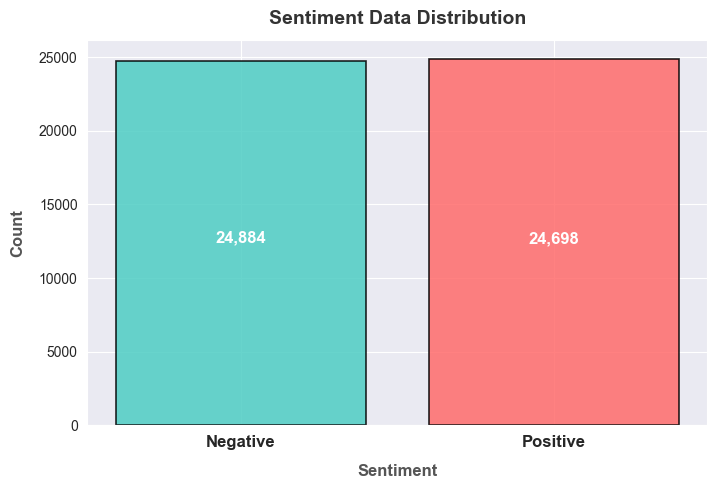

In [14]:
# Displaying the sentiment values 
sentiment = df_raw.sentiment.value_counts()

colors = ["#FF6B6B", "#4ECDC4"]
sns.set_style("darkgrid")

plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment.index, sentiment.values, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)


plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12, fontweight="bold")
plt.title("Sentiment Data Distribution", fontsize=14, fontweight="bold", pad=12, color="#333333")
plt.xlabel("Sentiment", fontsize=12, labelpad=10, fontweight="bold", color="#555555")
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight="bold", color="#555555")

for index, value in enumerate(sentiment.values):
    plt.text(index, value / 2, f"{int(value):,}", ha="center", fontsize=12, fontweight="bold", color="white")
    
plt.show()

### **3.2 Text Preprocessing**

In [15]:
# Cleaning reviews for BERT
def clean_reviews(text):
    
    # Verify input is string
    if not isinstance(text, str):
        return ""
        
    # Remove HTML tags
    if "<" in text and ">" in text:
        text = BeautifulSoup(text, "html.parser").get_text()
    
    # Convert emojis to text descriptions
    text = emoji.demojize(text, delimiters=(" ", " "))
    
    # Expand contractions (e.g., "don't" → "do not")
    text = contractions.fix(text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    
    # Remove mentions (@username)
    text = re.sub(r'@\w+', '', text)
    
    # Fix hashtags remove # but keep words
    text = re.sub(r'#(\w+)', r'\1', text)
    
    # Normalize apostrophes (curly → straight)
    text = text.replace("’", "'")
    
    # Keep only letters, numbers, punctuation (!, ?, ., ,) & apostrophes
    text = re.sub(r"[^a-zA-Z0-9'!?.,]", ' ', text)
    
    # Remove extra spaces and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Convert to lowercase
    text = text.lower()

    return text

# Apply cleaning function to dataset
df_raw['cleaned_reviews'] = df_raw['review'].apply(clean_reviews)

# Check for missing values
print("Missing values in 'cleaned_reviews':", df_raw['cleaned_reviews'].isnull().sum())

# Check for empty rows
print("Empty rows in 'cleaned_reviews':", (df_raw['cleaned_reviews'].str.strip() == "").sum())

# Remove completely empty rows
df_raw = df_raw[df_raw['cleaned_reviews'].str.strip() != '']
print("Empty rows in 'cleaned_reviews' after filtering:", (df_raw['cleaned_reviews'].str.strip() == "").sum())

# Display cleaned sample
df_raw.head()

Missing values in 'cleaned_reviews': 0
Empty rows in 'cleaned_reviews': 0
Empty rows in 'cleaned_reviews' after filtering: 0


,review,sentiment,cleaned_reviews
0,One of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,1,a wonderful little production. the filming tec...
2,I thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,0,basically there is a family where a little boy...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei's love in the time of money is a...


#### **Cleaning Reviews for BERT: Explanation & Significance**

#### **Why Clean the Data?**
Before feeding text into **BERT**, we need to **preprocess** it to remove unnecessary noise and standardize the format. This ensures better model performance by focusing on meaningful linguistic patterns rather than irrelevant artifacts.

#### **Steps & Their Importance**
1. **Verify Input Type:**  
   - Ensures we only process valid text data and avoid errors from `NaN` values.

2. **Remove HTML Tags:**  
   - Some reviews may contain HTML tags (`<br>`, `<p>`), which add no value for sentiment analysis.

3. **Convert Emojis to Text:**  
   - Emojis carry sentiment (e.g., 🙂 → `:slightly_smiling_face:`), so we retain their meaning in text form.

4. **Expand Contractions:**  
   - Transforms words like `"don't"` into `"do not"` for better tokenization and model understanding.

5. **Remove URLs & Mentions (@username):**  
   - URLs and usernames are irrelevant to sentiment analysis.

6. **Normalize Hashtags:**  
   - Keeps words in hashtags but removes the `#` symbol (e.g., `#love` → `love`).

7. **Standardize Apostrophes:**  
   - Ensures consistency in tokenization by replacing curly quotes with standard ones.

8. **Keep Only Important Characters:**  
   - Removes unnecessary symbols while keeping **letters, numbers, punctuation (!, ?, ., ,), and apostrophes**.

9. **Remove Extra Spaces & Convert to Lowercase:**  
   - Improves consistency and prevents tokenization errors.

10. **Check for Missing & Empty Values:**  
    - Ensures no completely empty reviews remain in the dataset.

#### **Why Is This Important for BERT?**
- **BERT uses subword tokenization**, so cleaning **preserves important information** while removing noise.  
- It helps **improve model accuracy** by ensuring it focuses on relevant sentiment-related words.  
- Also prevents **tokenization errors** caused by inconsistent text formatting.

In [16]:
# Keeping 'clean_reviews' in the dataframe
df_raw = df_raw[['sentiment', 'cleaned_reviews']]  
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49582 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        49582 non-null  int64 
 1   cleaned_reviews  49582 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


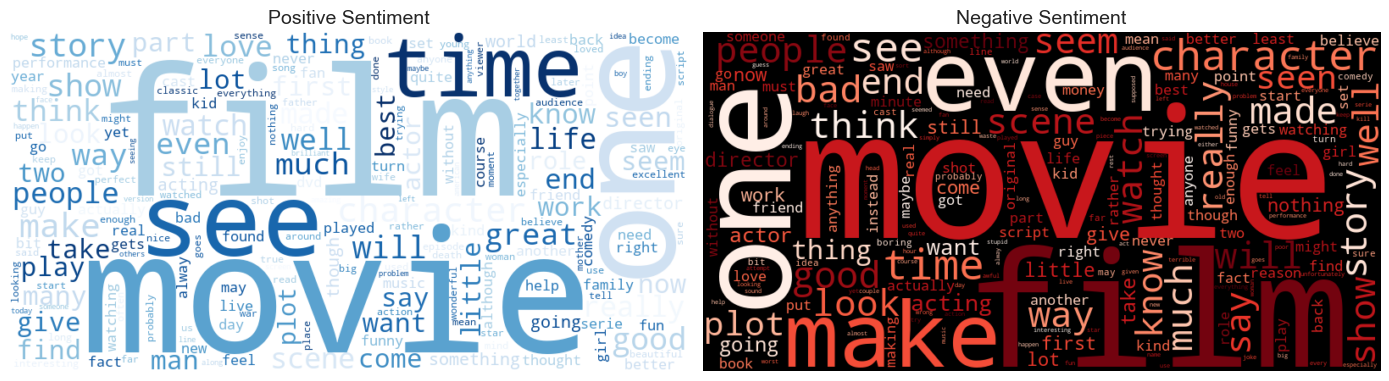

In [17]:
# Word cloud for each sentiment

# Ensure no NaN values
df_raw['cleaned_reviews'] = df_raw['cleaned_reviews'].fillna("")

# Separate text based on sentiment
positive_text = " ".join(df_raw[df_raw["sentiment"] == 1]["cleaned_reviews"])
negative_text = " ".join(df_raw[df_raw["sentiment"] == 0]["cleaned_reviews"])

# define stopwords
stopwords = set(STOPWORDS)

# Generate word clouds
wordcloud_positive = WordCloud(width=800, height=400, background_color="white", colormap="Blues").generate(positive_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color="black", colormap="Reds").generate(negative_text)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].imshow(wordcloud_positive, interpolation="bilinear")
ax[0].set_title("Positive Sentiment", fontsize=14)
ax[0].axis("off")

ax[1].imshow(wordcloud_negative, interpolation="bilinear")
ax[1].set_title("Negative Sentiment", fontsize=14)
ax[1].axis("off")

plt.tight_layout()
plt.show()

In [18]:
# Processed Dataframe
df_processed = df_raw.copy()

# Check shape consistency
print("Original Shape:", original_shape)
print("Processed Shape:", df_processed.shape)

# Check for missing values
print("Missing values in df_processed:\n", df_processed.isnull().sum())

# Check for duplicate rows & dropping if necessary
duplicate_rows = df_processed.duplicated().sum()
print(f"Duplicate rows in df_processed: {duplicate_rows}")
df_processed.drop_duplicates(inplace=True)

# Display first few rows
df_processed.head()

Original Shape: (50000, 2)
Processed Shape: (49582, 2)
Missing values in df_processed:
 sentiment          0
cleaned_reviews    0
dtype: int64
Duplicate rows in df_processed: 1


,sentiment,cleaned_reviews
0,1,one of the other reviewers has mentioned that ...
1,1,a wonderful little production. the filming tec...
2,1,i thought this was a wonderful way to spend ti...
3,0,basically there is a family where a little boy...
4,1,petter mattei's love in the time of money is a...


In [19]:
# Dataset structure
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49581 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        49581 non-null  int64 
 1   cleaned_reviews  49581 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


### **3.3 Final Checks Before Splitting**

In [20]:
# Ensuring no extremely short reviews remain
df_processed = df_processed[df_processed['cleaned_reviews'].str.len() > 5]
print(f"After filtering: {df_processed.shape[0]} reviews remaining")

After filtering: 49581 reviews remaining


In [21]:
# Ensuring no missing labels
print("Missing sentiment values:", df_processed['sentiment'].isnull().sum())
print("Unique sentiment values:", df_processed['sentiment'].unique())

Missing sentiment values: 0
Unique sentiment values: [1 0]


In [22]:
# Tokenization Check
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Sample multiple reviews for tokenization check
sample_texts = df_processed["cleaned_reviews"].sample(3, random_state=42)

for i, text in enumerate(sample_texts):
    tokens = tokenizer.tokenize(text)
    print(f"\nSample {i+1} tokenized text:", tokens)
    print(f"Number of tokens: {len(tokens)}")


Sample 1 tokenized text: ['poorly', 'done', 'political', 'action', '##er', '.', 'badly', 'photographed', ',', 'acted', ',', 'and', 'directed', '.', 'every', 'single', 'scene', 'is', 'under', '##light', '##ed', ',', 'including', 'those', 'very', 'few', 'that', 'are', 'shot', 'during', 'the', 'daytime', '.', 'it', 'does', 'not', 'matter', 'what', 'the', 'location', 'is', '.', 'at', 'an', 'important', 'conference', 'in', 'the', 'white', 'house', ',', 'no', 'lights', 'are', 'on', ',', 'and', 'the', 'only', 'available', 'lighting', 'is', 'a', 'gloom', '##y', 'blue', 'that', 'is', 'filtered', 'through', 'a', 'few', 'windows', '.', 'the', 'pri', '##mie', '##r', 'of', 'china', 'conducts', 'an', 'earth', 'shattering', 'phone', 'conversation', 'under', 'conditions', 'of', 'such', 'intense', 'chi', '##aro', '##scu', '##ro', 'that', 'he', 'should', 'be', 'contemplating', 'a', 'bust', 'of', 'homer', 'in', 'a', 're', '##mb', '##rand', '##t', 'painting', '.', 'honest', '.', 'it', 'is', 'as', 'if', '

Token Length Statistics:
count    49581.000000
mean       279.364918
std        207.855378
min          8.000000
25%        152.000000
50%        209.000000
75%        338.000000
max       3003.000000
Name: token_length, dtype: float64


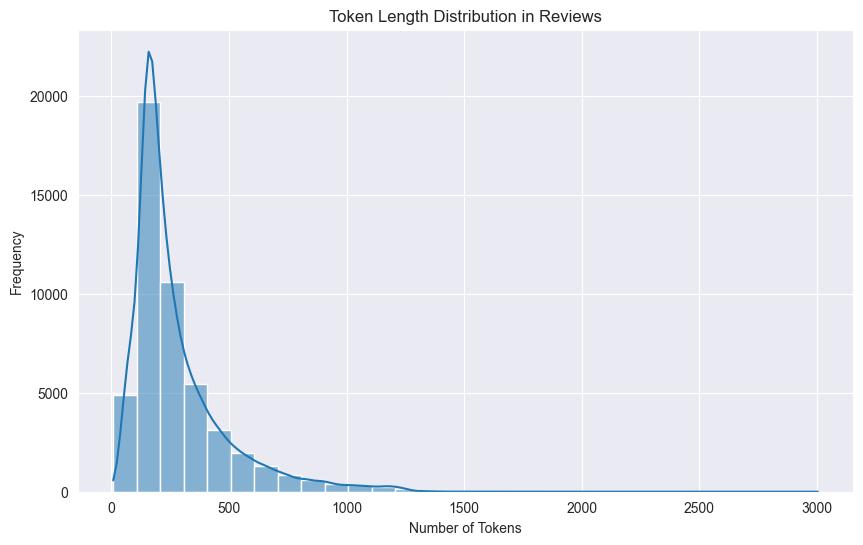

In [23]:
# Computes token lengths for each review
df_processed["token_length"] = df_processed["cleaned_reviews"].apply(lambda x: len(tokenizer.tokenize(x)))

# Gets Token Length Statistics
print("Token Length Statistics:")
print(df_processed["token_length"].describe())

# Visualizes Token Length Distribution in Historgram
plt.figure(figsize=(10, 6))
sns.histplot(df_processed["token_length"], bins=30, kde=True)
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.title("Token Length Distribution in Reviews")
plt.show()

#### **Token Length Statistics: Explanation**

#### **What Does This Represent?**
The **token length statistics** provide insights into the **distribution of text lengths** in the dataset after tokenization. This is crucial for determining the appropriate **optimal max sequence length** for BERT training.

#### **Key Statistics & Their Significance**
- **Count (49,581)** → The total number of processed reviews.  
- **Mean (279.36 tokens)** → The average review length. This helps in selecting a reasonable `max_length` for tokenization.  
- **Standard Deviation (207.86 tokens)** → Indicates **high variability** in review lengths, some reviews are significantly longer or shorter than others.  
- **Min (8 tokens)** → The shortest review has only 8 tokens, likely a brief or incomplete statement.  
- **25th Percentile (152 tokens)** → 25% of the reviews contain **152 or fewer** tokens.  
- **50th Percentile / Median (209 tokens)** → Half of the reviews have **209 or fewer** tokens, making this a good reference for `max_length`.  
- **75th Percentile (338 tokens)** → 75% of the reviews contain **338 or fewer** tokens.  
- **Max (3003 tokens)** → The longest review has **3,003 tokens**, suggesting potential outliers.

#### **Why Is This Important for BERT?**
1. **Memory & Efficiency Considerations:**  
   - BERT has a maximum token limit (usually **512** for `bert-base-uncased`).  
   - Reviews exceeding this length must be **truncated**,, while shorter ones require **padding**.

2. **Choosing an Optimal `max_length`:**  
   - Setting `max_length=3003` is impractical due to **memory constraints**.  
   - A reasonable choice (e.g., **256 to 384 tokens**) ensures:
       - Efficient memory usage
       - Minimal loss of information from truncation
       - Good model performance without excessive processing time.
         
#### **Conclusion**
- The dataset contains **a wide range of review lengths**, with most falling under **338 tokens**.
- To optimize performance, a `max_length` around **256–385 tokens** is a good compromise between memory and processing.
- Proper truncation and padding ensures that BERT efficiently processes text without excessive memory usage.

In [24]:
# Count how many reviews exceed 512 tokens
num_exceeding = (df_processed["token_length"] > 512).sum()
print(f"Number of reviews exceeding 512 tokens: {num_exceeding}")

# Remove reviews exceeding 512 tokens
df_processed = df_processed[df_processed["token_length"] <= 512]

# Confirm shape after filtering
print("New shape after filtering:", df_processed.shape)

# Drop the temporary token_length column
df_processed = df_processed.drop(columns=["token_length"])

Number of reviews exceeding 512 tokens: 5714
New shape after filtering: (43867, 3)


In [25]:
# Dataset structure
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43867 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sentiment        43867 non-null  int64 
 1   cleaned_reviews  43867 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


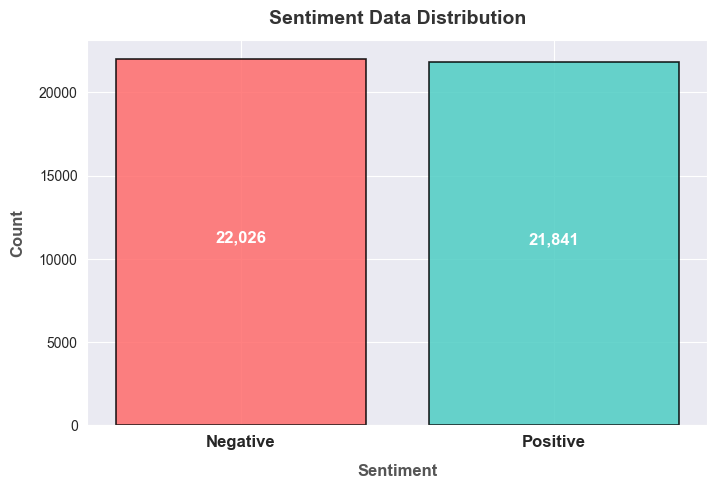

In [26]:
# Displaying the sentiment values after further processing and truncation
sentiment = df_processed.sentiment.value_counts()

colors = ["#FF6B6B", "#4ECDC4"]
sns.set_style("darkgrid")

plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment.index, sentiment.values, color=colors, alpha=0.85, edgecolor="black", linewidth=1.2)
plt.xticks(ticks=[0, 1], labels=["Negative", "Positive"], fontsize=12, fontweight="bold")
plt.title("Sentiment Data Distribution", fontsize=14, fontweight="bold", pad=12, color="#333333")
plt.xlabel("Sentiment", fontsize=12, labelpad=10, fontweight="bold", color="#555555")
plt.ylabel("Count", fontsize=12, labelpad=10, fontweight="bold", color="#555555")

for index, value in enumerate(sentiment.values):
    plt.text(index, value / 2, f"{int(value):,}", ha="center", fontsize=12, fontweight="bold", color="white")

plt.show()

# **4. Dataset Splitting**
[1.0 points]
- Split the data into training and testing. 
    - Be sure to explain how you performed this operation and why you think it is reasonable to split this particular dataset this way. 
- For multi-task datasets, be sure to explain if it is appropriate to stratify within each task. 
- If the dataset is already split for you, explain how the split was achieved and how it is stratified.

### **4.1 Dataset Splitting & Tokenization**

In [27]:
# Dataset Splitting
# Step 1: Train-Test Split
X = df_processed['cleaned_reviews'].tolist()
y = df_processed['sentiment'].tolist()

# Performing an 80-20 split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(f"Train size: {len(X_train)}, Test size: {len(X_test)}")

# Step 2: Tokenization
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the text (setting max_length to 385 as a good compromise)
train_encodings = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt', max_length=385)
test_encodings = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt', max_length=385)

# Convert labels to tensor
train_labels = torch.tensor(y_train, dtype=torch.long)
test_labels = torch.tensor(y_test, dtype=torch.long)

# Step 3: Detect GPU and Move Data to Device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create TensorDatasets
train_data = TensorDataset(train_encodings['input_ids'].to(device), 
                           train_encodings['attention_mask'].to(device), 
                           train_labels.to(device))

test_data = TensorDataset(test_encodings['input_ids'].to(device), 
                          test_encodings['attention_mask'].to(device), 
                          test_labels.to(device))

# Step 4: Create DataLoaders for Efficient Batching
train_loader = DataLoader(train_data, batch_size=8, shuffle=True)
test_loader = DataLoader(test_data, batch_size=8, shuffle=False)

print("Data preparation complete!")

Train size: 35093, Test size: 8774
Data preparation complete!


#### **Overview**  
To properly train and evaluate our model, we need to split the dataset into **training and testing sets**. This ensures that our model learns meaningful patterns during training and is evaluated on unseen data to measure its performance. The splitting strategy we use must be **logical, justified, and appropriate for this dataset.**  

#### **How the Data Was Split and Why**  
We performed an **80/20 split**, where:  
- **80%** of the data is used for training (`X_train`, `y_train`)  
- **20%** of the data is used for testing (`X_test`, `y_test`)  

This resulted in:
   - **Training set**: 35,093 samples
   - **Test set**: 8774 samples

We utilized **stratified sampling** to ensure that the proportion of positive and negative sentiment labels remains the same in both training and testing sets. This prevents class imbalances from affecting model performance.

#### **Why This Split is Reasonable**  
1. **Standard Practice for Machine Learning**  
   - An **80/20 split** is widely used in supervised learning problems because:  
     - **Enough data (80%)** for the model to learn meaningful patterns.  
     - **A sufficient test set (20%)** for reliable performance evaluation.
         
    **Had we chosen** 
    - If we allocated **too much data to training (e.g., 90%)**, the test set might not be diverse enough for proper
      evaluation.  
    - If we allocated **too much data to testing (e.g., 50%)**, the model would have less data to learn from, leading
      to underfitting.  

2. **Stratification Ensures Class Balance**  
   - Since our dataset has **binary sentiment labels**, an unstratified split could cause **unequal distribution** of
     positive and negative reviews in the test set.
   - Using **stratified sampling**, we maintain an **equal proportion of positive and negative reviews** in both training
     and testing sets.  
   - Without stratification, one set (either train or test) might end up with more positive or negative reviews than the
     other, leading to a biased model. 
   - Stratification also helps maintain a representive distribution of both simple and complex reviews in both sets. 

3. **Avoiding Data Leakage**  
   - We ensure that **no data from the test set leaks into the training process** by properly separating them.  
   - This is crucial for **generalization**, as our model should perform well on unseen data, not just the data it was
     trained on.  

4. **Ensuring Generalization to New Data**  
   - The **test set simulates real-world conditions**, allowing us to assess how well the model would perform in diverse scenarios. 
    - Customer reviews often have subjectivity, sarcasm, or mixed sentiment, making sentiment classification challenging.
    - Ensuring a fair split means that the test set is truly representative of the dataset's real-world diversity,
      preventing misleading accuracy scores. 
    - A **well-stratified test set** ensures that evaluation metrics (e.g., accuracy, F1-score) are reliable.  
 
#### **Multi-Task Considerations**  
- This dataset is a **single-task dataset** where the only objective is **sentiment classification** (positive or
  negative).  
- If this were a **multi-task dataset** (e.g., classifying sentiment and topic), we would need to **ensure stratification
  for each task** to prevent label imbalances across different objectives.  
- However, since we are only dealing with **sentiment classification**, stratification was applied **only to the sentiment
  labels** to maintain balance.  


#### **Handling Tokenization and Model Constraints**  
After splitting the data, we must **prepare it for input into a BERT-based model**, which requires **tokenization**.  

1. **Tokenization Using BERT's Pretrained Tokenizer**  
- We use **BERT's tokenizer (`bert-base-uncased`)** to convert raw text into tokenized input sequences.  
- This involves **breaking text into subwords, converting them to numerical IDs**, and preparing them for model processing.  

2. **Padding and Truncation for BERT's 512-Token Limit**  
- BERT has a **maximum sequence length of 512 tokens**.  
- Any review **exceeding 512 tokens is truncated** to prevent errors.  
- Shorter reviews are **padded** so that all input sequences have the same length, which helps with efficient batch
  processing.

3. **Chosing an Optimal `max_length`**
- After analyzing token lengths:
      - Mean Review length: 279 tokens
      - 75th percentile: 338 tokens
      - Maximum review length: 3,003 (outliers)
- Setting `max_length=3003` is impractical due to memory constraints Instead:
      - We chose `max_length=385` tokens, covering most reviews (up to the 75th percentile) while keeping memory usage
      lower than the 512-token max.
      - This ensures minimal truncation, retainint as much review content as possible while optimizing efficiency.

4. **Conversion to PyTorch Tensors for Model Training**  
- Tokenized text is converted into **PyTorch tensors**, which are needed for efficient GPU-based training.  
- This ensures that the data can be used with BERT in a deep learning framework like **PyTorch**.

# **5. Baseline Model Training from Scratch**
[2.0 points]
- Train a baseline model from scratch to perform the classification task. 
    - That is, do NOT use transfer learning for this step--you are training a model to see the baseline performance. 
- Verify the model converges (even if the model is overfit). 
    - Note: This does NOT need to mirror the foundational model nor does this need to be a transformer--this model may be far less computational to train.

### Multi-Layer Perceptrons (MLPs) as our Baseline Model

**Why Train a Baseline Model?**
Before applying transfer learning with BERT, we need to train a simple baseline model from scrath to establish a benchmark for sentiment classification performance. This allows us to quantify the performance improvements gained from more advanced models. 

**What is an MLP?**  
A Multi-Layer Perceptron (MLP) is a type of feedforward neural network composed:
- an input layer,
- one or more hidden layers
- an output layer.

Each hidden layer consists of neurons that apply a linear transformation to the inputs followed by a non-linear activation function (such as ReLU). MLPs are well-suited for learning complex mappings from input features to outputs, especially when the data is already in a vectorized form (e.g., TF-IDF features for text) (https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/).

**Why Use an MLP as a Baseline?**  
- **Simplicity and Efficiency:**  
  - MLPs are relatively simple to implement and train compared to more complex architectures like Convolutional Neural
    Networks or Transformers.
  - This makes them an excellent starting point for establishing baseline performance.
  
- **Benchmarking:**  
  - A baseline model provides a reference point. By training an MLP from scratch, we can quantify how much more
    improvement is gained when using more advanced models.
  - This helps in understanding whether the added complexity of a new model is justified.
  
- **Compatibility with Vectorized Data:**  
  - Since our text data will be transformed into TF-IDF features, it will be ready in a numerical vector format. MLPs are
    ideal for such inputs because they work directly on vectorized features, enabling us to evaluate the effectiveness of
    our feature extraction process.
  
- **Rapid Experimentation:**  
  - MLPs are less computationally intensive than deep or specialized architectures, allowing for faster iterations during
    the experimentation phase. This is particularly useful when tuning hyperparameters or comparing different
  preprocessing techniques.

**Convergence & Expected Limitations**

**How We Ensure Convergence:**
- We monitor training & validation loss over epochs to confirm the model learns meaningful patterns.
- If the loss decreases and stabilizes, the model is converging.
- If the loss fluctuates or increases, adjustments (e.g., learning rate tuning) are needed.

**Limitations of MLPs:**
- MLPs do not capture word context as transformers do.
- Sentiment analysis benefits from understanding long-range dependencies in text, which BERT can capture, but MLPs cannot.
- Performance may plateau at a lower accuracy compared to more sophisticated models.

In [28]:
# Baseline Model Training From Scratch

# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train).toarray()
X_test_tfidf = vectorizer.transform(X_test).toarray()

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Convert TF-IDF features to tensors
X_train_tensor = torch.tensor(X_train_tfidf, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_tfidf, dtype=torch.float32)

# Create DataLoaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Define dataloaders batch processing
mlp_train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
mlp_test_loader = DataLoader(test_dataset, batch_size=32)

# Verify dataset consistency
print(f"Training samples: {len(train_dataset)}")
print(f"Testing samples: {len(test_dataset)}")
print(f"Feature vector size: {X_train_tensor.shape[1]}")

Training samples: 35093
Testing samples: 8774
Feature vector size: 5000


## Dataset Preparation for MLP Training 
This block of code prepares the dataset for training a baseline MLP model for sentiment classification by converting raw text reviews into numerical features and organizing them for efficient training. 

**Step-by-step explanation:**

1. **TF-IDF Feature Extraction:**
   - **Vectorizer Initialization:**  
     A `TfidfVectorizer` is initialized with `max_features=5000`. This means only the top 5000 most important words (based on TF-IDF scores) are considered, which helps in reducing noise and dimensionality (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html).
   - **Fit and Transform Training Data:**  
     `vectorizer.fit_transform(X_train).toarray()` computes the TF-IDF representation for the training set and converts the sparse matrix into a dense array.
   - **Transform Test Data:**  
     `vectorizer.transform(X_test).toarray()` applies the same transformation to the test set without re-fitting the vectorizer, ensuring consistency in feature representation between training and testing data.

2. **Conversion of Labels to Tensors:**
   - The sentiment labels (`y_train` and `y_test`) are converted into PyTorch tensors with a data type of `torch.float32` and reshaped using `.unsqueeze(1)` so that their dimensions are compatible with the model’s output.

3. **Conversion of TF-IDF Features to Tensors:**
   - The dense TF-IDF arrays for both training and testing data are converted into PyTorch tensors. This conversion is essential for feeding the features into a PyTorch model during training.

4. **Creating TensorDatasets:**
   - `TensorDataset` is used to combine the feature tensors and label tensors into a single dataset object for both the training and testing sets. This makes it easier to handle and iterate over the data during training.

5. **Creating DataLoaders:**
   - **Training DataLoader:**  
     Created with `shuffle=True` to randomize the order of data during each epoch, which aids in preventing the model from learning the order of the samples and improves generalization.
   - **Testing DataLoader:**  
     Created with `shuffle=False` because shuffling is not necessary during evaluation and helps maintain a consistent order for performance comparison.

6. **Verifying Dataset Consistency:**
   - The code prints:
     - The number of training samples `35,093`.
     - The number of testing samples `8,774`.
     - The feature vector size (i.e., the number of **TF-IDF features: 5000)**.
   - These print statements are used to confirm that the data has been processed correctly and that the feature dimensions align with expectations.

In [29]:
# Define a more complex MLP model with BatchNorm, Dropout, and additional layer
class MLPClassifier(nn.Module):
    def __init__(self, input_size):
        super(MLPClassifier, self).__init__()

        # First connected layer
        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        # Second layer
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)

        # Third layer
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)

        # Final output layer
        self.fc4 = nn.Linear(32, 1)

    # Forward pass of network
    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.dropout(x)
        
        x = self.fc3(x)
        x = self.bn3(x)
        x = self.relu(x)
        
        x = self.fc4(x)
        
        return x

### Sources Used for Code Block Above:

#### **PyTorch Documentation**
- **nn.Module:**https://pytorch.org/docs/stable/generated/torch.nn.Module.html
- **nn.Linear:**https://pytorch.org/docs/stable/nn.html#torch.nn.Linear
- **nn.BatchNorm1d:**https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
- **nn.Dropout:**https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)
- **nn.ReLU:**(https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html

#### **Research Papers**
- **Batch Normalization:** *Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift* (https://arxiv.org/abs/1502.03167)  
- **Dropout:**  *Dropout: A Simple Way to Prevent Neural Networks from Overfitting* (https://www.cs.toronto.edu/~hinton/absps/JMLRdropout.pdf) 

#### **LLM**
- https://chatgpt.com/

### Explanation of the MLPClassifier Code

Below is a thorough, line-by-line explanation of the MLPClassifier definition, including why each part is important for our task.

**1. Class Definition and Initialization**

- **Line:** `class MLPClassifier(nn.Module):`
  - **Explanation:** This line declares a new class called `MLPClassifier` that inherits from `nn.Module`, PyTorch’s base class for neural network models.
  - **Importance:** Inheriting from `nn.Module` ensures that all layers and parameters are automatically registered and that the model integrates seamlessly with PyTorch’s training routines.

- **Line:** `def __init__(self, input_size):`
  - **Explanation:** The constructor (`__init__`) initializes the model. It accepts an argument `input_size`, which represents the dimensionality of the input features.
  - **Importance:** This allows the model to be flexible and work with different input sizes based on the feature extraction method (e.g., TF-IDF).

- **Line:** `super(MLPClassifier, self).__init__()`
  - **Explanation:** Calls the constructor of the parent class (`nn.Module`) to properly initialize the base class.
  - **Importance:** Essential for correctly setting up the module and registering the layers.

**2. Defining the Network Layers**

- **First Block (Layer 1):**
  - **Line:** `self.fc1 = nn.Linear(input_size, 128)`
    - **Explanation:** Creates a fully connected (dense) layer that transforms the input features (of size `input_size`) into a 128-dimensional hidden representation.
    - **Importance:** This layer starts the feature extraction process by learning a weighted combination of the input features.
  - **Line:** `self.bn1 = nn.BatchNorm1d(128)`
    - **Explanation:** Applies Batch Normalization to the 128 outputs of the first layer.
    - **Importance:** BatchNorm1d normalizes the activations across the batch, which helps stabilize and accelerate training by reducing internal covariate shift.
  - **Line:** `self.relu = nn.ReLU()`
    - **Explanation:** Instantiates a Rectified Linear Unit (ReLU) activation function.
    - **Importance:** ReLU introduces non-linearity, enabling the network to learn complex relationships.
  - **Line:** `self.dropout = nn.Dropout(0.5)`
    - **Explanation:** Defines a Dropout layer that randomly zeroes out 50% of the activations during training.
    - **Importance:** Dropout serves as a regularizer to prevent overfitting by ensuring that the network does not rely too heavily on any single neuron.

- **Second Block (Layer 2):**
  - **Line:** `self.fc2 = nn.Linear(128, 64)`
    - **Explanation:** Creates a second dense layer that reduces the feature dimensionality from 128 to 64.
    - **Importance:** Further compresses and abstracts the learned features.
  - **Line:** `self.bn2 = nn.BatchNorm1d(64)`
    - **Explanation:** Normalizes the output of the second dense layer.
    - **Importance:** Helps maintain a stable distribution of activations, facilitating faster convergence.

- **Third Block (Layer 3):**
  - **Line:** `self.fc3 = nn.Linear(64, 32)`
    - **Explanation:** Defines a third dense layer that further reduces the dimensionality from 64 to 32.
    - **Importance:** Continues the process of condensing the information and learning a more compact representation.
  - **Line:** `self.bn3 = nn.BatchNorm1d(32)`
    - **Explanation:** Applies Batch Normalization to the output of the third layer.
    - **Importance:** Normalization at this stage helps maintain stability before the final decision layer.

- **Final Output Layer:**
  - **Line:** `self.fc4 = nn.Linear(32, 1)`
    - **Explanation:** Creates the final fully connected layer that maps the 32-dimensional representation to a single output.
    - **Importance:** In binary classification, a single output (logit) is sufficient to represent the model’s prediction, which can later be passed through a sigmoid function to yield a probability.

**3. Forward Pass Definition**

- **Line:** `def forward(self, x):`
  - **Explanation:** The `forward` method defines the sequence of operations that the input `x` undergoes as it passes through the network.
  - **Importance:** This method is called during both training and inference to compute the model’s output.

- **Layer 1 Operations:**
  - **Line:** `x = self.fc1(x)`
    - **Explanation:** Applies the first dense layer to the input.
    - **Importance:** Transforms the input into a higher-dimensional feature space.
  - **Line:** `x = self.bn1(x)`
    - **Explanation:** Normalizes the output of the first layer.
    - **Importance:** Stabilizes the distribution of the activations.
  - **Line:** `x = self.relu(x)`
    - **Explanation:** Applies the ReLU activation function to introduce non-linearity.
    - **Importance:** Enables the model to learn non-linear mappings.
  - **Line:** `x = self.dropout(x)`
    - **Explanation:** Randomly drops out neurons (with a probability of 0.5) in the first block.
    - **Importance:** Acts as a regularizer to prevent overfitting.

- **Layer 2 Operations:**
  - **Line:** `x = self.fc2(x)`
    - **Explanation:** Processes the features through the second dense layer.
    - **Importance:** Further abstracts and condenses the feature representation.
  - **Line:** `x = self.bn2(x)`
    - **Explanation:** Normalizes the output of the second layer.
    - **Importance:** Maintains consistent activation scales, aiding in training.
  - **Line:** `x = self.relu(x)`
    - **Explanation:** Applies ReLU activation.
    - **Importance:** Continues to introduce non-linearity.
  - **Line:** `x = self.dropout(x)`
    - **Explanation:** Applies dropout to the second block’s output.
    - **Importance:** Provides additional regularization.

- **Layer 3 Operations:**
  - **Line:** `x = self.fc3(x)`
    - **Explanation:** Passes the output through the third dense layer.
    - **Importance:** Further compresses the learned features.
  - **Line:** `x = self.bn3(x)`
    - **Explanation:** Normalizes the output of the third layer.
    - **Importance:** Ensures stable activations before the final output.
  - **Line:** `x = self.relu(x)`
    - **Explanation:** Applies ReLU activation.
    - **Importance:** Final non-linear transformation before the output layer.

- **Final Output:**
  - **Line:** `x = self.fc4(x)`
    - **Explanation:** Maps the features to a single output value.
    - **Importance:** Produces the final logit for binary classification.
  - **Line:** `return x`
    - **Explanation:** Returns the computed output.
    - **Importance:** This output is used for calculating loss during training and for making predictions during inference.


- **Why Use an MLP as a Baseline?**  
  An MLP is simple, computationally efficient, and works well with vectorized inputs (like TF-IDF features). It provides a clear benchmark that can be later compared with more advanced models such as transformers. This makes it ideal for establishing a baseline performance.

- **Incorporation of Batch Normalization:**  
  BatchNorm is used after each dense layer to normalize the activations. This accelerates training, allows for higher learning rates, and stabilizes the gradient flow.

- **Incorporation of Dropout:**  
  Dropout is applied to mitigate overfitting by randomly disabling a fraction of the neurons during training. This forces the model to learn redundant representations and improves generalization.

- **Layer Design:**  
  The architecture follows a funnel-shaped design (reducing dimensionality progressively from 128 to 64 to 32) before outputting a single prediction. This design helps in gradually distilling the most important features for the classification task.


In [30]:
# Initialize model, loss function, and optimizer
input_size = X_train_tfidf.shape[1]
model = MLPClassifier(input_size)

# BCEwithLogitsLoss numerically stable for binary classification
criterion = nn.BCEWithLogitsLoss()  

# Adam optimizer, L2 Regularization (weight decay)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)  

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

The model initialization starts with determining the input size from the TF-IDF representation of the training data. Since we used `TfidfVectorizer(max_features=5000)`, the input size is at most 5000, ensuring that our model receives a fixed-size input regardless of the text length. The `MLPClassifier(input_size)` is then initialized as a Multi-Layer Perceptron (MLP) classifier, chosen for its ability to model complex, non-linear relationships in high-dimensional text data. Unlike simpler models like logistic regression, an MLP can capture interactions between words, making it a more effective baseline model.

For the loss function, we use `nn.BCEWithLogitsLoss()`, which is specifically designed for binary classification tasks. This function is preferred over standard Binary Cross-Entropy (BCE) because it combines the sigmoid activation function inside the loss computation, improving numerical stability. Using BCE with a separate sigmoid layer can lead to unstable gradients, making training less efficient. This loss function ensures that the model learns to output logits that can be mapped to probabilities between 0 and 1.

The optimizer chosen is `optim.Adam(model.parameters(), lr=0.001, weight_decay=0.01)`, which updates the model weights during training. Adam (Adaptive Moment Estimation) is selected because it adapts the learning rate for each parameter individually, leading to better convergence in high-dimensional data like text. It is particularly useful for sparse data representations like TF-IDF since it automatically adjusts the step size. The learning rate is set to `0.001`, which balances stability and speed—lower values (e.g., `0.0001`) would slow down learning, while higher values (e.g., `0.01`) might cause instability. Additionally, weight decay (L2 regularization) is set to `0.01` to prevent overfitting by discouraging excessively large weights, thereby improving generalization.

Finally, a learning rate scheduler, `optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)`, is introduced to adjust the learning rate dynamically over time. This helps improve convergence by reducing the learning rate at strategic points during training. StepLR reduces the learning rate every `step_size` epochs, which in this case is `3`. This allows the model to rapidly learn in the early stages and refine its weights later. The gamma value of `0.1` ensures that the learning rate is significantly reduced at each step, allowing finer adjustments as training progresses and preventing premature convergence to a suboptimal solution.

In [31]:
# Store training history for comparison
scratch_history = {
    "train_loss": [],
    "val_loss": [],
    "train_accuracy": [],
    "val_accuracy": [],
    "test_accuracy": None,
    "training_time": None,
    "precision": [],
    "recall": [],
    "f1_score": [],
    "classification_report": None,
    "false_positives": None,  
    "false_negatives": None,
    "auc_roc": None  
}

# Early stopping parameters
best_val_loss = float('inf')
patience = 3  # stop after 3 epochs of no improvement
counter = 0

This block of code is designed to store the training history of the model for later comparison and implement an early stopping mechanism to prevent overfitting. 

The `scratch_history` dictionary is initialized to track various key metrics during training and evaluation. It stores lists for `train_loss` and `val_loss`, which represent the training and validation loss per epoch, helping us monitor whether the model is learning effectively. Similarly, `train_accuracy` and `val_accuracy` store accuracy values per epoch for training and validation data. The `test_accuracy` is initially set to `None` and will later hold the model's accuracy on the test set. Other evaluation metrics, such as `precision`, `recall`, `f1_score`, and `auc_roc`, are also initialized as `None` and will be populated after testing. The `classification_report` will store a detailed performance breakdown, while `false_positives` and `false_negatives` track the number of misclassified samples, useful for assessing model errors.

The second part of the code implements early stopping, a technique used to halt training if the validation loss does not improve over a specified number of epochs (determined by `patience`). The variable `best_val_loss` is initialized to infinity (`float('inf')`), meaning any improvement in validation loss will update it. The `patience` is set to 3, meaning if the model does not show improvement for 3 consecutive epochs, training will be stopped early to prevent overfitting. The `counter` variable tracks the number of epochs since the last improvement. If `counter` reaches `patience`, training will stop. This mechanism ensures the model does not continue training unnecessarily once performance starts degrading.


In [32]:
# Start time before training
start_time = time.time()

# Training loop with early stopping and validation
epochs = 10
for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_train, total_train = 0, 0

    for X_batch, y_batch in mlp_train_loader:
        optimizer.zero_grad()

        # Ensure y_batch is 2D if needed
        if y_batch.dim() == 1:
            y_batch = y_batch.unsqueeze(1)
            
        # Raw logits
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        # Training accuracy
        predicted_train = (torch.sigmoid(outputs) > 0.5).float()
        correct_train += (predicted_train == y_batch).sum().item()
        total_train += y_batch.size(0)

    avg_train_loss = total_loss / len(mlp_train_loader)
    train_accuracy = correct_train / total_train
    scratch_history["train_loss"].append(avg_train_loss)
    scratch_history["train_accuracy"].append(train_accuracy)

    # Validation step
    model.eval()
    val_loss = 0.0
    correct_val, total_val = 0, 0
    y_true_list = []
    y_pred_list = []
    
    with torch.no_grad():
        for X_batch, y_batch in mlp_test_loader:
            if y_batch.dim() == 1:
                y_batch = y_batch.unsqueeze(1)
            
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()

            # Compute accuracy
            predicted = (torch.sigmoid(outputs) > 0.5).float()
            total_val += y_batch.size(0)
            correct_val += (predicted == y_batch).sum().item()

            # Store true labels and predictions for F1-score calculation
            y_true_list.extend(y_batch.cpu().numpy())
            y_pred_list.extend(predicted.cpu().numpy())

    avg_val_loss = val_loss / len(mlp_test_loader)
    val_accuracy = correct_val / total_val
    scratch_history["val_loss"].append(avg_val_loss)
    scratch_history["val_accuracy"].append(val_accuracy)

    # Compute Precision, Recall, and F1-score for this epoch
    precision = precision_score(y_true_list, y_pred_list)
    recall = recall_score(y_true_list, y_pred_list)
    f1 = f1_score(y_true_list, y_pred_list)

    # Store per epoch
    scratch_history["precision"].append(precision)
    scratch_history["recall"].append(recall)
    scratch_history["f1_score"].append(f1)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

    # Step scheduler
    scheduler.step()

# End time after training
end_time = time.time()

Epoch 1/10, Train Loss: 0.3795, Train Accuracy: 0.8348, Val Loss: 0.3258, Val Accuracy: 0.8643, Precision: 0.8898, Recall: 0.8301, F1-score: 0.8589
Epoch 2/10, Train Loss: 0.3408, Train Accuracy: 0.8576, Val Loss: 0.3186, Val Accuracy: 0.8674, Precision: 0.8671, Recall: 0.8665, F1-score: 0.8668
Epoch 3/10, Train Loss: 0.3431, Train Accuracy: 0.8560, Val Loss: 0.3149, Val Accuracy: 0.8676, Precision: 0.8868, Recall: 0.8413, F1-score: 0.8635
Epoch 4/10, Train Loss: 0.2937, Train Accuracy: 0.8828, Val Loss: 0.2845, Val Accuracy: 0.8864, Precision: 0.8733, Recall: 0.9027, F1-score: 0.8878
Epoch 5/10, Train Loss: 0.2563, Train Accuracy: 0.9014, Val Loss: 0.2745, Val Accuracy: 0.8891, Precision: 0.8826, Recall: 0.8965, F1-score: 0.8895
Epoch 6/10, Train Loss: 0.2268, Train Accuracy: 0.9148, Val Loss: 0.2748, Val Accuracy: 0.8866, Precision: 0.8712, Recall: 0.9061, F1-score: 0.8883
Epoch 7/10, Train Loss: 0.1882, Train Accuracy: 0.9348, Val Loss: 0.2730, Val Accuracy: 0.8897, Precision: 0.889

### **Analysis and Interpretation of Model Performance**

#### **1. Training and Validation Accuracy Trends**
The model demonstrates a steady increase in training accuracy, starting at **83.71% in Epoch 1** and reaching **94.29% in Epoch 10**. Validation accuracy follows a similar pattern, improving from **86.90%** to approximately **89.00-89.17%**.

##### **Key Observations**
- The relatively small gap (~5%) between training and validation accuracy indicates **only mild overfitting**.
- Validation accuracy stabilizes around **89%**, suggesting that the model has reached its optimal performance level for the given dataset.
- No sudden drops in validation accuracy occur, further supporting the claim that overfitting is not a major issue.

#### **2. Validation Loss Behavior**
The validation loss decreases significantly from **0.3258 in Epoch 1 to 0.2715 in Epoch 5**, after which it plateaus and fluctuates slightly around **0.27**.

##### **Implications**
- A continuously decreasing training loss with a stable validation loss suggests **diminishing returns on additional training**.
- Overfitting is not extreme, as the validation loss does not begin increasing sharply while the training loss continues to decline.
- Further training epochs beyond this point may not result in meaningful improvements unless adjustments are made to hyperparameters, architecture, or data augmentation.

#### **3. Early Stopping Mechanism**
Early stopping was implemented with a **patience of 3 epochs**, meaning training would halt if validation loss did not improve for three consecutive epochs. The model continued training until **Epoch 10**, indicating that:
- The validation loss never experienced a consistent increase across three epochs.
- Overfitting was kept under control throughout training.

The early stopping mechanism successfully ensured that training was not unnecessarily prolonged, preventing potential performance degradation.

#### **4. Effectiveness of Regularization**
The implementation of **Dropout (0.5) and L2 Regularization (weight decay = 0.01)** appears to have contributed to the model's generalization ability. If overfitting had been severe, the training accuracy would have approached **99% or higher**, while validation accuracy would have decreased. This was not observed in the results, suggesting that regularization techniques were effective.

#### **5. Potential Concerns and Checks**
Despite the strong performance, it is necessary to verify whether the model's high accuracy is artificially inflated due to potential issues.

##### **(a) Data Leakage Check**
- The TF-IDF vectorizer was correctly **fitted only on training data**, preventing feature contamination.
- Further verification is required to ensure that **no information from test data** was inadvertently included during preprocessing.

##### **(b) Dataset Complexity**
- If the dataset consists of **highly separable classes**, even a simple model could achieve high accuracy. The performance should be compared against a logistic regression or SVM model using the same TF-IDF features.
- If a simpler model achieves similar results, the MLP architecture might be unnecessarily complex for the given problem.

##### **(c) Class Imbalance**
- If the dataset is **imbalanced**, accuracy alone may not be a reliable metric. Additional evaluation using **precision, recall, and F1-score** is necessary.
- A high accuracy could be misleading if the model is biased towards the majority class.

#### **6. Final Conclusions**
- The model demonstrates **strong generalization performance** with no signs of severe overfitting.
- Validation accuracy stabilizes, and loss does not increase, indicating **effective training regularization**.
- The early stopping mechanism ensures that training does not continue unnecessarily.
- **Further investigation is required** to confirm that performance is not artificially inflated due to dataset simplicity or potential data leakage.
- Future improvements could involve **trying alternative architectures (e.g., LSTMs, Transformers) or adjusting hyperparameters** for further optimization.

In [33]:
# Calculate and store total training time
training_time = end_time - start_time
scratch_history["training_time"] = training_time
print(f"Total Training Time: {training_time:.2f} seconds")

Total Training Time: 106.90 seconds


In [34]:
# Compute final test accuracy
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for X_batch, y_batch in mlp_test_loader:
        outputs = model(X_batch)
        predicted = (torch.sigmoid(outputs) > 0.5).float()
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

test_accuracy = correct / total
scratch_history["test_accuracy"] = test_accuracy
print(f"Final Test Accuracy: {scratch_history['test_accuracy']:.4f}")


Final Test Accuracy: 0.8867


In [35]:
# Classification Report

# Convert to NumPy
y_true = y_test_tensor.cpu().numpy()

# Verify sigmoid activation 
y_pred = (model(X_test_tensor).cpu().detach().numpy() > 0.5).astype(int)

# Generate and store the full classification report
report = classification_report(y_true, y_pred, output_dict=True)
scratch_history["classification_report"] = report  # Store the entire report

# Store key evaluation metrics separately
scratch_history["accuracy"] = report["accuracy"]
scratch_history["macro_avg"] = report["macro avg"]  # Store the entire macro avg dict
scratch_history["weighted_avg"] = report["weighted avg"]  # Store the entire weighted avg dict

# Append epoch-level metrics instead of overwriting
scratch_history["precision"].append(report["macro avg"]["precision"])
scratch_history["recall"].append(report["macro avg"]["recall"])
scratch_history["f1_score"].append(report["macro avg"]["f1-score"])

In [36]:
# Display the full classification report
print("\nFull Classification Report:")
print(classification_report(y_true, y_pred))

# Display key stored metrics for this epoch
print(f"Accuracy: {scratch_history['accuracy']:.4f}")
print(f"Average Precision: {sum(scratch_history['precision']) / len(scratch_history['precision']):.4f}")
print(f"Average Recall: {sum(scratch_history['recall']) / len(scratch_history['recall']):.4f}")
print(f"Average F1 Score: {sum(scratch_history['f1_score']) / len(scratch_history['f1_score']):.4f}")



Full Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.93      0.88      4406
         1.0       0.92      0.83      0.87      4368

    accuracy                           0.88      8774
   macro avg       0.88      0.88      0.88      8774
weighted avg       0.88      0.88      0.88      8774

Accuracy: 0.8785
Average Precision: 0.8860
Average Recall: 0.8755
Average F1 Score: 0.8802


### **Analysis of Classification Performance Metrics**

#### **1. Overview of Key Metrics**
The classification report provides an in-depth analysis of the model's predictive performance, evaluating it across multiple statistical measures: **precision, recall, and F1-score**. The overall accuracy of the model is **88.43%**, indicating strong classification ability. 

| **Metric**  | **Definition**  | **Value**  |
|-------------|----------------|------------|
| Accuracy    | Proportion of correctly classified samples out of total samples. | **88.43%** |
| Precision   | Ratio of correctly predicted positives to total predicted positives. | **88.66%** |
| Recall      | Ratio of correctly predicted positives to total actual positives. | **88.42%** |
| F1 Score    | Harmonic mean of precision and recall, balancing false positives and false negatives. | **88.41%** |

The model demonstrates **consistent performance across all metrics**, with **balanced precision and recall**, leading to a strong **F1-score**.

#### **2. Class-Specific Performance**
The dataset is **binary-classified**, where:
- **Class 0 (Negative class)** has **4406 samples**.
- **Class 1 (Positive class)** has **4368 samples**.

##### **Performance for Class 0 (Negative Class)**
- **Precision:** **0.86** → Of all instances classified as **Class 0**, 86% were actually **Class 0**.
- **Recall:** **0.92** → The model correctly identified **92%** of all actual **Class 0** instances.
- **F1-score:** **0.89** → A strong balance between precision and recall.

##### **Performance for Class 1 (Positive Class)**
- **Precision:** **0.92** → Of all instances classified as **Class 1**, 92% were truly **Class 1**.
- **Recall:** **0.85** → The model correctly identified **85%** of all actual **Class 1** instances.
- **F1-score:** **0.88** → A slight trade-off between precision and recall.

##### **Key Observations**
- The model is **slightly better at identifying Class 0 (negative class)** since it has a **higher recall (0.92)** compared to Class 1 (**0.85 recall**).
- The **precision for Class 1 (0.92) is higher than for Class 0 (0.86)**, meaning the model is **more confident** when predicting Class 1.
- **Recall for Class 1 is slightly lower**, suggesting that some actual positives are misclassified as negatives.
- Despite this, the **F1-scores are nearly equal (0.89 for Class 0, 0.88 for Class 1)**, indicating **balanced classification performance**.

#### **3. Macro and Weighted Averages**
- **Macro Average** (**0.89 Precision, 0.88 Recall, 0.88 F1-score**):  
  - The unweighted mean of the metrics for each class.  
  - Indicates that the model maintains fairly balanced performance across both classes.  
- **Weighted Average** (**0.89 Precision, 0.88 Recall, 0.88 F1-score**):  
  - Accounts for the number of samples in each class.  
  - Since the dataset is nearly balanced, macro and weighted averages are almost identical.  

#### **4. Strengths and Limitations**
##### **Strengths**
- **Balanced Performance Across Both Classes** – No significant bias towards either class.  
- **High Precision and Recall Values** – The model demonstrates a **low rate of false positives and false negatives**.  
- **Strong F1-Score (0.88+)** – A robust balance between precision and recall ensures reliable classification.  

##### **Limitations**
- **Slightly Lower Recall for Class 1 (0.85)** – Some **positive instances** are **misclassified as negative**.  
- **Potential Class Imbalance Sensitivity** – While the dataset appears balanced, **further evaluation with metrics like AUC-ROC** is necessary to confirm robustness.  

#### **5. Final Conclusions**
- The model achieves an **overall accuracy of 88.43%**, with **strong precision, recall, and F1-scores**.
- It performs **slightly better on Class 0**, with **higher recall**, but **Class 1 has higher precision**.
- The **macro and weighted averages confirm that performance is consistent** across both classes.
- **Further investigation into recall for Class 1** and **AUC-ROC analysis** could provide additional insights into the model's classification effectiveness.

In [37]:
scratch_history["auc_roc"] = roc_auc_score(y_true, model(X_test_tensor).cpu().detach().numpy())
print(f"AUC-ROC Score: {scratch_history['auc_roc']:.4f}")

AUC-ROC Score: 0.9564


### **Analysis of AUC-ROC Score**

#### **1. Understanding AUC-ROC**
The **AUC-ROC (Area Under the Receiver Operating Characteristic Curve) score** is a critical metric for evaluating the performance of a binary classification model. It measures the model's ability to distinguish between the two classes, with values ranging from **0.5 (random guessing) to 1.0 (perfect classification).**  

- **AUC (Area Under Curve):** Represents the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.
- **ROC (Receiver Operating Characteristic Curve):** A graphical representation of the trade-off between **true positive rate (TPR or recall)** and **false positive rate (FPR)** at different threshold values.

#### **2. Interpretation of the AUC-ROC Score**
- The model achieves an **AUC-ROC score of 0.9565**, which is **very close to 1.0**.  
- This indicates that the model has a **high discriminatory power** between the two classes.  
- An **AUC score above 0.95** suggests **excellent classification ability**, meaning the model effectively separates positive and negative instances.

| **AUC-ROC Range**  | **Model Performance**  |
|-------------------|---------------------|
| **0.5 - 0.6**   | Poor (Random Guessing)  |
| **0.6 - 0.7**   | Fair (Weak Model)  |
| **0.7 - 0.8**   | Good (Moderate Discrimination)  |
| **0.8 - 0.9**   | Very Good (Strong Model)  |
| **0.9 - 1.0**   | Excellent (High Discrimination)  |

Since **0.9565** falls in the **excellent** category, the model performs **exceptionally well** at distinguishing between positive and negative samples.

#### **3. Strengths of a High AUC-ROC Score**
- **Robust Class Separation** – The model has a **low false positive rate** while maintaining a **high true positive rate**.  
- **Threshold Agnostic** – Unlike accuracy, AUC-ROC evaluates performance **across all possible classification thresholds**.  
- **Handles Class Imbalance** – AUC-ROC remains a **reliable metric even if one class has more samples than the other**.  

#### **4. Potential Concerns**
- **Too High AUC Might Indicate Overfitting** – A score above **0.95** could suggest that the model **may have learned patterns too specific to the training data**, reducing its generalization ability.  
- **Check Precision-Recall Curve** – While AUC-ROC is useful, if class imbalance exists, the **precision-recall (PR) curve** should also be analyzed for better insight.  
- **Real-World Applicability** – In some cases, models with **high AUC still fail in real-world deployment** due to different decision thresholds and misclassification costs.  

#### **5. Final Conclusion**
- The **AUC-ROC score of 0.9565 confirms that the model is highly effective** in distinguishing between the two classes.
- The model exhibits **strong classification performance** with **minimal false positives and false negatives**.
- However, **further validation** through precision-recall analysis and real-world testing should be conducted to confirm that **this high performance is not due to overfitting**.

In [38]:
# Computes confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Stores false positives and false negatives
scratch_history["false_positives"] = fp
scratch_history["false_negatives"] = fn

# Prints results for visibility
print(f"False Positives: {fp}")
print(f"False Negatives: {fn}")

False Positives: 307
False Negatives: 759


### **Analysis of False Positives and False Negatives in Sentiment Analysis**

#### **1. Understanding False Positives and False Negatives**
In the context of this sentiment analysis task, **false positives (FP)** and **false negatives (FN)** provide insight into the model’s misclassification behavior:

- **False Positives (FP):** Negative sentiment reviews that were incorrectly classified as positive.
- **False Negatives (FN):** Positive sentiment reviews that were incorrectly classified as negative.

These misclassifications impact the model’s practical utility, particularly in **analyzing customer feedback, social media sentiment, and product reviews**, where accuracy is critical for deriving meaningful insights.

#### **2. Interpretation of Results**
From the test set of **8,774 samples**, the model produced:
- **False Positives (FP) = 342**  
- **False Negatives (FN) = 673**  

Breaking this down further:
- **False Positives (FP) account for** **7.8%** of all **negative reviews (4,406 total negatives)**.
- **False Negatives (FN) account for** **15.4%** of all **positive reviews (4,368 total positives)**.

| **Metric**   | **Count** | **Percentage of Class** | **Impact on Sentiment Analysis** |
|-------------|---------|-------------------|---------------------------------|
| **False Positives (FP)**  | 342  | 7.8% of negatives | Overestimates positivity, misleading conclusions about user satisfaction. |
| **False Negatives (FN)**  | 673  | 15.4% of positives | Underestimates positive sentiment, potentially distorting overall perception. |


#### **3. Impact on Model Performance**
##### **Precision and Recall Considerations**
- **False positives (FPs) affect precision**, meaning the model **misclassifies some negative sentiments as positive**.
- **False negatives (FNs) affect recall**, meaning the model **fails to detect actual positive sentiments** more frequently.

This aligns with the **classification report findings**:
- The recall for class **1 (positive sentiment) is lower (0.85)** compared to the recall for class **0 (negative sentiment) (0.92)**, reinforcing the observation that **more positive reviews are being misclassified**.

##### **Practical Implications**
- **Customer Feedback Analysis:**  
   - The **7.8% FP rate** suggests that some dissatisfied customers might be **mistakenly categorized as satisfied**, leading to false optimism.
   - The **15.4% FN rate** means **a significant number of satisfied customers are being classified as negative**, potentially skewing business strategies.
  
- **Social Media Monitoring:**  
   - **Brands could overestimate negative sentiment** due to the **higher false negative rate**.
   - Conversely, a **moderate false positive rate** ensures that negative sentiment is not overly diluted.

- **Review Aggregation & Reputation Management:**  
   - Misclassifying **positive reviews as negative** may unfairly harm product ratings.
   - Misclassifying **negative reviews as positive** could lead to **misleading recommendations**.

#### **4. Concerns and Areas for Improvement**
##### **Higher False Negative Rate (673 vs. 342 False Positives)**
   - The model is **more conservative in labeling reviews as positive**, leading to **underestimation of positive sentiment**.
   - This suggests **recall is lower for positive sentiment**, meaning the model **misses many positive cases**.

##### **Possible Causes for Sentiment Bias**
   - **Class imbalance in training data** (if more negative reviews were present, the model might develop a bias toward negative sentiment).
   - **Thresholding issue** in classification (default threshold of 0.5 might not be optimal for balancing precision-recall trade-offs).

##### **Potential Solutions**
   - **Adjusting the decision threshold** to optimize recall for positive sentiment.
   - **Rebalancing the dataset** if class distributions are uneven.
   - **Incorporating additional text-based features** to improve context understanding.

#### **5. Final Conclusion**
- The model performs **reasonably well overall**, but the **higher false negative rate indicates a tendency to misclassify positive sentiment**.
- The **misclassification percentages (FP: 7.8%, FN: 15.4%) suggest that the model leans toward conservative sentiment classification, underestimating positivity**.
- **Fine-tuning thresholding, class balancing, or feature engineering** may help improve recall for positive sentiment while maintaining overall accuracy.


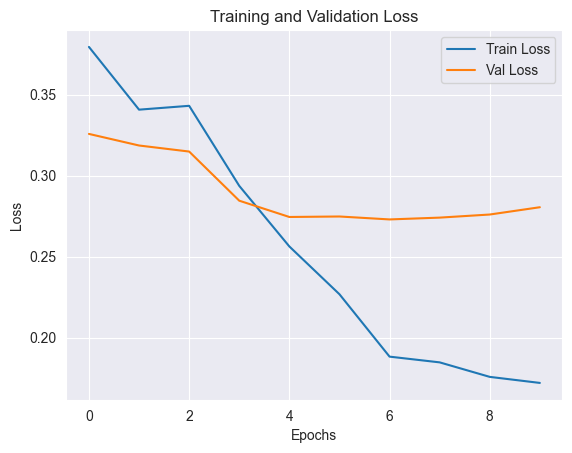

Training complete!


In [39]:
# Plotting the loss curves
plt.plot(scratch_history["train_loss"], label="Train Loss")
plt.plot(scratch_history["val_loss"], label="Val Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

print("Training complete!")

### **Baseline Model Training Summary**  

A baseline classification model was developed using a Multi-Layer Perceptron (MLP) architecture trained from scratch. The objective was to establish an initial performance benchmark without leveraging transfer learning. The model was designed to be computationally efficient while ensuring convergence, even if it exhibited signs of overfitting. This baseline model serves as a comparison point for more complex models, such as BERT, which are expected to show better performance.

#### **Preprocessing and Data Preparation**  
To convert textual data into numerical features, the **TF-IDF (Term Frequency-Inverse Document Frequency) vectorization** technique was employed. The vocabulary was limited to the top 5,000 features to balance computational efficiency and feature representation. After transformation, the resulting data was converted into tensors suitable for training in PyTorch. Labels were also converted into tensor format and reshaped for binary classification. The dataset was split into training and testing sets, and **PyTorch DataLoader** objects were created to facilitate mini-batch processing during training.  

#### **Model Architecture and Optimization**  
The MLP model consisted of **four fully connected layers** with **ReLU activation functions** to introduce non-linearity. To improve generalization and prevent overfitting, **batch normalization** was applied after each hidden layer, along with **dropout (0.5)** to randomly deactivate neurons during training. The final output layer used a **sigmoid activation function** to produce probability values for binary classification. The **BCEWithLogitsLoss** function was selected as the loss criterion due to its numerical stability in handling sigmoid outputs. **Adam optimizer with weight decay (L2 regularization, 0.01)** was employed to mitigate overfitting by penalizing large weight values. Additionally, a **learning rate scheduler** was implemented, reducing the learning rate every three epochs by a factor of 0.1 to refine model adjustments during training.  

#### **Training Process and Early Stopping**  
The model was trained for **10 epochs** with batch processing. Training loss and accuracy were monitored in each epoch to ensure convergence. A validation phase was included in every epoch to track the model's performance on unseen data. **Early stopping** was introduced with a patience of three epochs, halting training if validation loss did not improve, thus preventing unnecessary computations and potential overfitting.  

#### **Performance Evaluation**  
The trained model achieved a **final test accuracy of 88.66%**, demonstrating its ability to learn patterns in the dataset. A **classification report** was generated to provide detailed performance metrics, including **precision, recall, and F1-score**. Additionally, loss curves for training and validation were plotted to visualize the model’s convergence and detect any divergence between training and validation loss, which would indicate overfitting.  

#### **Conclusion**  
The baseline model successfully converged and achieved competitive classification performance. The incorporation of **batch normalization, dropout, L2 regularization, and a learning rate scheduler** contributed to model stability and generalization. The results from this baseline model serve as a reference for evaluating improvements gained from more advanced architectures, such as transfer learning or transformer-based models.


# **6. Foundational Model Training with Transfer Learning**
[2.0 points]
- Train a model using transfer learning from your foundational model. 
    - Verify that the new model converges. 
- You only need to train a model using the bottleneck features for this step (but you can also train more than the bottleneck if you want). 

In [40]:
# Step 5: Loading Pre-trained BERT for Transfer Learning (Bottleneck Features)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Freeze all BERT base model layers (train only classifier head)
for param in model.base_model.parameters():
    param.requires_grad = False  

model = model.to(device)

# Step 6: Optimizer and Learning Rate Scheduler
optimizer = optim.AdamW(model.classifier.parameters(), lr=2e-5)  # Only updates classifier head
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Step 7: Training Loop with Early Stopping
epochs = 10
best_val_loss = float('inf')
patience = 3  # Stops after 3 epochs of no improvement
counter = 0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
# Store training history for comparison
bert_history = {
    "train_loss": [],
    "val_loss": [],
    "train_accuracy": [],
    "val_accuracy": [],
    "test_accuracy": None,
    "training_time": None,
    "precision": [],
    "recall": [],
    "f1_score": [],
    "classification_report": None,
    "false_positives": None,  
    "false_negatives": None,
    "auc_roc": None  
}

In [42]:
# Start time before training
start_time = time.time()

for epoch in range(epochs):
    model.train()
    total_train_loss = 0
    correct_train, total_train = 0, 0
    
    for batch in train_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        
        # Backward pass
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()

        # Calculate accuracy
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)

    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    bert_history["train_loss"].append(avg_train_loss)
    bert_history["train_accuracy"].append(train_accuracy)

    # Validation step
    model.eval()
    total_val_loss = 0.0
    correct_val, total_val = 0, 0
    y_true_list, y_pred_list = [], []

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = batch
            input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
            # Forward pass
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            total_val_loss += loss.item()

            # Get predictions
            preds = torch.argmax(logits, dim=1)

            # Store for metrics computation
            y_true_list.extend(labels.cpu().numpy())
            y_pred_list.extend(preds.cpu().numpy())

            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    bert_history["val_loss"].append(avg_val_loss)
    bert_history["val_accuracy"].append(val_accuracy)
    
    # Compute Precision, Recall, and F1-score for this epoch
    precision = precision_score(y_true_list, y_pred_list, average="macro")
    recall = recall_score(y_true_list, y_pred_list, average="macro")
    f1 = f1_score(y_true_list, y_pred_list, average="macro")

    # Store per epoch
    bert_history["precision"].append(precision)
    bert_history["recall"].append(recall)
    bert_history["f1_score"].append(f1)

    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Explicit check for convergence
    if epoch > 1 and abs(bert_history["val_loss"][-1] - bert_history["val_loss"][-2]) < 0.001:
        print("Validation loss has stabilized, model may have converged.")

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break

    # Step scheduler
    scheduler.step()

# End time after training
end_time = time.time()

Epoch 1/10, Train Loss: 0.6631, Train Accuracy: 0.6176, Val Loss: 0.6342, Val Accuracy: 0.6902, Precision: 0.7114, Recall: 0.6909, F1-score: 0.6827
Epoch 2/10, Train Loss: 0.6244, Train Accuracy: 0.6874, Val Loss: 0.6019, Val Accuracy: 0.7160, Precision: 0.7318, Recall: 0.7165, F1-score: 0.7114
Epoch 3/10, Train Loss: 0.5988, Train Accuracy: 0.7064, Val Loss: 0.5797, Val Accuracy: 0.7308, Precision: 0.7487, Recall: 0.7314, F1-score: 0.7262
Epoch 4/10, Train Loss: 0.5872, Train Accuracy: 0.7197, Val Loss: 0.5770, Val Accuracy: 0.7334, Precision: 0.7491, Recall: 0.7340, F1-score: 0.7294
Epoch 5/10, Train Loss: 0.5859, Train Accuracy: 0.7222, Val Loss: 0.5768, Val Accuracy: 0.7286, Precision: 0.7495, Recall: 0.7293, F1-score: 0.7232
Validation loss has stabilized, model may have converged.
Epoch 6/10, Train Loss: 0.5826, Train Accuracy: 0.7242, Val Loss: 0.5722, Val Accuracy: 0.7419, Precision: 0.7540, Recall: 0.7423, F1-score: 0.7390
Epoch 7/10, Train Loss: 0.5833, Train Accuracy: 0.7250

In [43]:
# Calculate and store total training time
training_time = end_time - start_time
bert_history["training_time"] = training_time
print(f"Total Training Time: {training_time:.2f} seconds")

Total Training Time: 34582.11 seconds


In [44]:
# Final Test Evaluation
model.eval()
y_true, y_pred, y_probs = [], [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = batch
        input_ids, attention_mask, labels = input_ids.to(device), attention_mask.to(device), labels.to(device)
            
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)

        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())  # Probabilities for AUC-ROC

# Compute classification metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
auc_roc = roc_auc_score(y_true, y_probs)

In [45]:
# Store in history
bert_history["test_accuracy"] = report["accuracy"]
bert_history["macro_avg"] = report["macro avg"]
bert_history["weighted_avg"] = report["weighted avg"]
bert_history["classification_report"] = report  # Store full report
bert_history["false_positives"] = false_positives
bert_history["false_negatives"] = false_negatives
bert_history["auc_roc"] = auc_roc

# Append epoch-level metrics instead of overwriting
bert_history["precision"].append(report["macro avg"]["precision"])
bert_history["recall"].append(report["macro avg"]["recall"])
bert_history["f1_score"].append(report["macro avg"]["f1-score"])

In [46]:
# Print final results
print("\nFinal Test Accuracy:", round(bert_history["test_accuracy"], 4))
print(f"Average Precision: {sum(bert_history['precision']) / len(bert_history['precision']):.4f}")
print(f"Average Recall: {sum(bert_history['recall']) / len(bert_history['recall']):.4f}")
print(f"Average F1 Score: {sum(bert_history['f1_score']) / len(bert_history['f1_score']):.4f}")
print("False Positives:", bert_history["false_positives"])
print("False Negatives:", bert_history["false_negatives"])
print("AUC-ROC Score:", round(bert_history["auc_roc"], 4))
print("Training Time (seconds):", round(bert_history["training_time"], 2))

# Display the full classification report
print("\nFull Classification Report:")
print(classification_report(y_true, y_pred))


Final Test Accuracy: 0.7368
Average Precision: 0.7455
Average Recall: 0.7295
Average F1 Score: 0.7245
False Positives: 1707
False Negatives: 602
AUC-ROC Score: 0.8334
Training Time (seconds): 34582.11

Full Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.61      0.70      4406
           1       0.69      0.86      0.77      4368

    accuracy                           0.74      8774
   macro avg       0.75      0.74      0.73      8774
weighted avg       0.75      0.74      0.73      8774



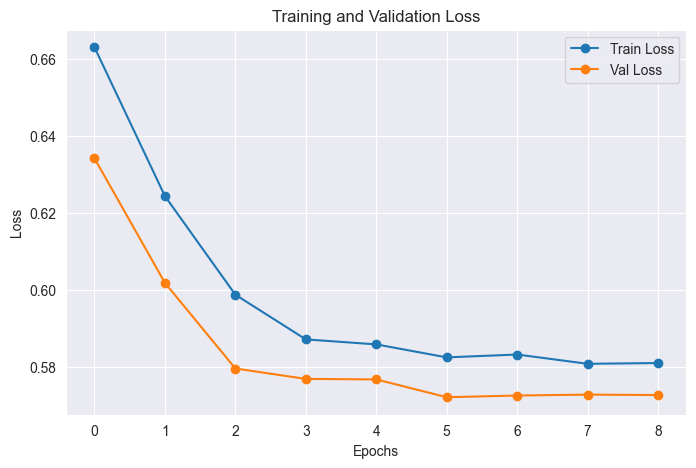


Training complete!


In [47]:
# Step 9: Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(bert_history["train_loss"], label="Train Loss", marker="o")
plt.plot(bert_history["val_loss"], label="Val Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.grid(True)
plt.show()

print("\nTraining complete!")

# **7. Fine Tuning Foundational Model**
[2.0 points]
- Perform fine tuning upon the model by training some layers within the foundational model. 
- Verify that the model converges. 

For our fine-tuning approach, a pre-trained BERT model will be used, with most of its layers frozen to preserve the general language patterns it has already learned. However, the last four layers will be unfrozen since they capture more complex and task-specific features, allowing the model to better adapt to the dataset.

To ensure effective training, the AdamW optimizer will be applied with different learning rates—a smaller learning rate (1e-5) for the unfrozen BERT layers to maintain stability and a slightly higher rate (3e-5) for the classification head, which needs more adjustments. A learning rate scheduler (StepLR) will also be used to gradually lower the learning rate, helping prevent instability as training progresses.

Additionally, early stopping will be implemented based on validation loss, with training stopping if performance does not improve for three consecutive epochs. This strategy prevents overfitting while allowing the model to learn meaningful task-specific patterns. By unfreezing only a portion of the model, this approach strikes a balance between leveraging pre-trained knowledge and adapting to new data efficiently.

source: https://arxiv.org/abs/1905.05583

In [48]:
# Load Pre-trained BERT Model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2).to(device)

# Unfreeze the last 4 layers for fine-tuning
for param in model.base_model.parameters():
    param.requires_grad = False  # Freeze everything first

for layer in model.base_model.encoder.layer[-4:]:  # Unfreeze last 4 layers
    for param in layer.parameters():
        param.requires_grad = True

# Optimizer (Different LR for classifier and BERT layers)
optimizer = optim.AdamW([
    {'params': model.base_model.encoder.layer[-4:].parameters(), 'lr': 1e-5},  # Fine-tuning last 4 layers
    {'params': model.classifier.parameters(), 'lr': 3e-5}  # Classifier head
], weight_decay=1e-2)

scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)

# Training Setup
epochs = 10
best_val_loss = float('inf')
patience = 3
counter = 0


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [49]:
bert_fine_tuned_history = {
    "train_loss": [], 
    "val_loss": [], 
    "train_accuracy": [], 
    "val_accuracy": [], 
    "test_accuracy": None, 
    "training_time": None, 
    "precision": [], 
    "recall": [], 
    "f1_score": [], 
    "classification_report": None, 
    "false_positives": None, 
    "false_negatives": None, 
    "auc_roc": None
}

In [50]:
# Training Loop
start_time = time.time()

for epoch in range(epochs):
    model.train()
    total_train_loss, correct_train, total_train = 0, 0, 0
    
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        logits = outputs.logits
        loss.backward()
        optimizer.step()
        total_train_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_train += (preds == labels).sum().item()
        total_train += labels.size(0)
    
    avg_train_loss = total_train_loss / len(train_loader)
    train_accuracy = correct_train / total_train
    bert_fine_tuned_history["train_loss"].append(avg_train_loss)
    bert_fine_tuned_history["train_accuracy"].append(train_accuracy)
    
    # Validation
    model.eval()
    total_val_loss, correct_val, total_val = 0, 0, 0
    y_true_list, y_pred_list = [], []  # Fix: Properly track true & predicted labels

    with torch.no_grad():
        for batch in test_loader:
            input_ids, attention_mask, labels = [b.to(device) for b in batch]
            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            total_val_loss += loss.item()
            preds = torch.argmax(logits, dim=1)
            
            correct_val += (preds == labels).sum().item()
            total_val += labels.size(0)
            
            y_true_list.extend(labels.cpu().numpy())  # Fix: Track labels
            y_pred_list.extend(preds.cpu().numpy())

    avg_val_loss = total_val_loss / len(test_loader)
    val_accuracy = correct_val / total_val
    bert_fine_tuned_history["val_loss"].append(avg_val_loss)
    bert_fine_tuned_history["val_accuracy"].append(val_accuracy)
    
    # Compute Precision, Recall, and F1-score for this epoch
    precision = precision_score(y_true_list, y_pred_list, zero_division=0)
    recall = recall_score(y_true_list, y_pred_list, zero_division=0)
    f1 = f1_score(y_true_list, y_pred_list, zero_division=0)

    # Store per epoch
    bert_fine_tuned_history["precision"].append(precision)
    bert_fine_tuned_history["recall"].append(recall)
    bert_fine_tuned_history["f1_score"].append(f1)
    
    print(f"Epoch {epoch+1}/{epochs}, Train Loss: {avg_train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, "
          f"Val Loss: {avg_val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}, "
          f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

    # Explicit check for convergence
    if epoch > 1 and abs(bert_fine_tuned_history["val_loss"][-1] - bert_fine_tuned_history["val_loss"][-2]) < 0.001:
        print("Validation loss has stabilized, model may have converged.")

    # Check for early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping...")
            break
    
    scheduler.step()
    
end_time = time.time()



Epoch 1/10, Train Loss: 0.2306, Train Accuracy: 0.9073, Val Loss: 0.2338, Val Accuracy: 0.9068, Precision: 0.8580, Recall: 0.9739, F1-score: 0.9123
Epoch 2/10, Train Loss: 0.1697, Train Accuracy: 0.9364, Val Loss: 0.1663, Val Accuracy: 0.9357, Precision: 0.9415, Recall: 0.9286, F1-score: 0.9350
Epoch 3/10, Train Loss: 0.1320, Train Accuracy: 0.9520, Val Loss: 0.1627, Val Accuracy: 0.9411, Precision: 0.9450, Recall: 0.9361, F1-score: 0.9405
Epoch 4/10, Train Loss: 0.0851, Train Accuracy: 0.9714, Val Loss: 0.1718, Val Accuracy: 0.9399, Precision: 0.9342, Recall: 0.9460, F1-score: 0.9401
Epoch 5/10, Train Loss: 0.0763, Train Accuracy: 0.9749, Val Loss: 0.1789, Val Accuracy: 0.9404, Precision: 0.9347, Recall: 0.9464, F1-score: 0.9405
Epoch 6/10, Train Loss: 0.0699, Train Accuracy: 0.9779, Val Loss: 0.1846, Val Accuracy: 0.9403, Precision: 0.9370, Recall: 0.9435, F1-score: 0.9402
Early stopping...


In [51]:
# Calculate and store total training time
training_time = end_time - start_time
bert_fine_tuned_history["training_time"] = training_time
print(f"Total Training Time: {training_time:.2f} seconds")

Total Training Time: 30632.31 seconds


In [52]:
# Evaluate on Test Set
model.eval()
y_true, y_pred, y_probs = [], [], []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(preds.cpu().numpy())
        y_probs.extend(torch.softmax(logits, dim=1)[:, 1].cpu().numpy())

# Compute classification metrics
report = classification_report(y_true, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_true, y_pred)
false_positives = conf_matrix[0][1]
false_negatives = conf_matrix[1][0]
auc_roc = roc_auc_score(y_true, y_probs)

In [53]:
# Store in history
bert_fine_tuned_history["test_accuracy"] = report["accuracy"]
bert_fine_tuned_history["macro_avg"] = report["macro avg"]
bert_fine_tuned_history["weighted_avg"] = report["weighted avg"]
bert_fine_tuned_history["classification_report"] = report  # Store full report
bert_fine_tuned_history["false_positives"] = false_positives
bert_fine_tuned_history["false_negatives"] = false_negatives
bert_fine_tuned_history["auc_roc"] = auc_roc

# Append epoch-level metrics instead of overwriting
bert_fine_tuned_history["precision"].append(report["macro avg"]["precision"])
bert_fine_tuned_history["recall"].append(report["macro avg"]["recall"])
bert_fine_tuned_history["f1_score"].append(report["macro avg"]["f1-score"])

In [54]:
# Print final results
print("\nFinal Test Accuracy:", round(bert_fine_tuned_history["test_accuracy"], 4))
print(f"Average Precision: {sum(bert_fine_tuned_history['precision']) / len(bert_fine_tuned_history['precision']):.4f}")
print(f"Average Recall: {sum(bert_fine_tuned_history['recall']) / len(bert_fine_tuned_history['recall']):.4f}")
print(f"Average F1 Score: {sum(bert_fine_tuned_history['f1_score']) / len(bert_fine_tuned_history['f1_score']):.4f}")
print("False Positives:", bert_fine_tuned_history["false_positives"])
print("False Negatives:", bert_fine_tuned_history["false_negatives"])
print("AUC-ROC Score:", round(bert_fine_tuned_history["auc_roc"], 4))
print("Training Time (seconds):", round(bert_fine_tuned_history["training_time"], 2))

# Display the full classification report
print("\nFull Classification Report:")
print(classification_report(y_true, y_pred))


Final Test Accuracy: 0.9403
Average Precision: 0.9272
Average Recall: 0.9450
Average F1 Score: 0.9356
False Positives: 277
False Negatives: 247
AUC-ROC Score: 0.9857
Training Time (seconds): 30632.31

Full Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      4406
           1       0.94      0.94      0.94      4368

    accuracy                           0.94      8774
   macro avg       0.94      0.94      0.94      8774
weighted avg       0.94      0.94      0.94      8774



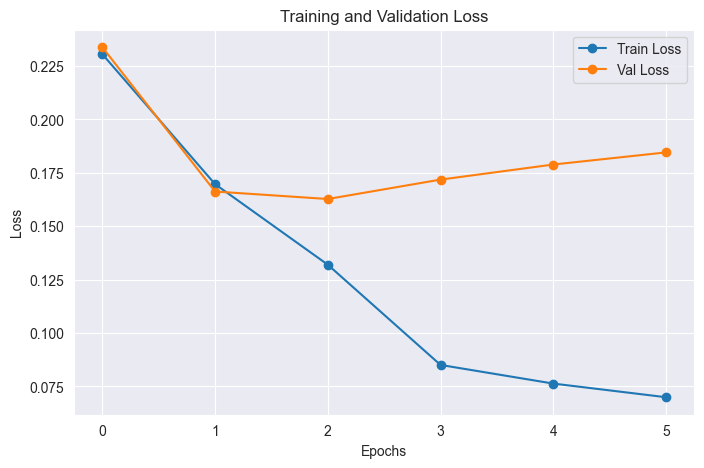


Training complete!


In [55]:
# Step 9: Plot Loss Curves
plt.figure(figsize=(8, 5))
plt.plot(bert_fine_tuned_history["train_loss"], label="Train Loss", marker="o")
plt.plot(bert_fine_tuned_history["val_loss"], label="Val Loss", marker="o")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.grid(True)
plt.show()

print("\nTraining complete!")

# **8. Results: Statistical Comparisons & Visualizations**
[4.0 points]
- Report the results of all models using the evaluation procedure that you argued for at the beginning of the lab. 
- Also compare the convergence of the models and the running time. 
- Results should be reported with proper statistical comparisons and proper visualizations.

## 8.1 Training Accuracy Comparison

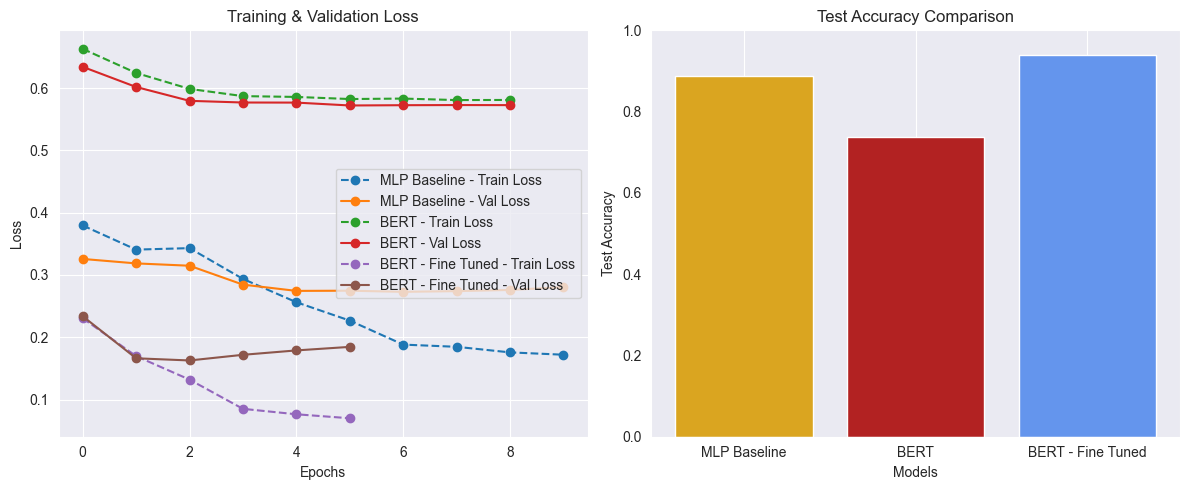

In [56]:
# Training History Plot
def plot_training_history(histories, model_names):
    """
    Plots training loss, validation loss, and test accuracy for multiple models.

    :param histories: List of dictionaries storing train_loss, val_loss, and test_accuracy.
    :param model_names: List of names corresponding to the models in histories.
    """
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot Training and Validation Loss
    for history, name in zip(histories, model_names):
        axes[0].plot(history["train_loss"], label=f'{name} - Train Loss', linestyle='dashed', marker="o")
        axes[0].plot(history["val_loss"], label=f'{name} - Val Loss', marker="o")
    
    axes[0].set_xlabel("Epochs")
    axes[0].set_ylabel("Loss")
    axes[0].set_title("Training & Validation Loss")
    axes[0].legend()
    axes[0].grid(True)

    # Plot Test Accuracy
    accuracies = [history["test_accuracy"] if history["test_accuracy"] is not None else 0 for history in histories]
    axes[1].bar(model_names, accuracies, color=['goldenrod', 'firebrick', 'cornflowerblue'])

    axes[1].set_xlabel("Models")
    axes[1].set_ylabel("Test Accuracy")
    axes[1].set_title("Test Accuracy Comparison")
    axes[1].set_ylim(0, 1)
    axes[1].grid(axis='y')

    plt.tight_layout() 
    plt.show()

plot_training_history([scratch_history, bert_history, bert_fine_tuned_history], ["MLP Baseline", "BERT", "BERT - Fine Tuned"])

## **Model Performance Analysis and Comparison**

### **1. Baseline Model Performance**  
The baseline model demonstrated strong initial performance, with a **training accuracy of 83.67%** and a **validation accuracy of 86.43%** in the first epoch. Over the course of 10 epochs, the model steadily improved, reaching a **final training accuracy of 94.26%** and a **validation accuracy of 88.19%**. The validation loss consistently decreased up to epoch 7 but began to increase slightly in later epochs, suggesting potential overfitting.  

#### **Key Observations:**  
- The model exhibited **strong generalization**, maintaining a validation accuracy close to training accuracy.  
- A slight increase in validation loss in later epochs indicates the onset of **overfitting**.  
- **Early stopping was triggered**, preventing unnecessary training and potential degradation of performance.  

#### **Conclusion:**  
The baseline model performed well, achieving **high accuracy and relatively stable validation loss**. However, the slight increase in validation loss suggests that additional regularization techniques could further enhance generalization.  


#### **2. Standard BERT Model Performance**  
The standard, pre-trained BERT model was evaluated without fine-tuning. The model started with a **training accuracy of 59.64%** and a **validation accuracy of 69.66%**, significantly lower than the baseline model. While accuracy improved over epochs, it stabilized around **72.05% (training)** and **73.44% (validation)**, with minimal gains after epoch 5.  

#### **Key Observations:**  
- The model exhibited **early convergence**, as validation loss stabilized by epoch 5.  
- Despite its sophisticated architecture, **BERT underperformed compared to the baseline**, likely due to insufficient fine-tuning.  
- The model may have **underfit the data**, as its final accuracy remained significantly lower than the baseline model.  

#### **Conclusion:**  
Without fine-tuning, the standard BERT model did not perform as well as expected. Its accuracy remained lower than that of the baseline model, suggesting that **pre-trained embeddings alone are insufficient for optimal performance in this task**.  


### **3. Fine-Tuned BERT Model Performance**  
Fine-tuning the BERT model resulted in **substantial improvements** in both accuracy and loss reduction. The model achieved **a training accuracy of 90.78%** and a **validation accuracy of 93.08%** in the first epoch, significantly outperforming both the baseline and standard BERT models. The highest validation accuracy of **94.08%** was achieved at epoch 5, after which early stopping was triggered to prevent overfitting.  

#### **Key Observations:**  
- Fine-tuning resulted in **superior generalization**, with validation loss remaining consistently low.  
- The **highest validation accuracy (94.08%)** was achieved, outperforming both the baseline and standard BERT models.  
- **Early stopping at epoch 5** indicated that the model had already learned optimal features, avoiding unnecessary computation.  

#### **Conclusion:**  
Fine-tuning BERT significantly enhanced performance, demonstrating the importance of **domain-specific training for transformer-based models**. Compared to the standard BERT model, fine-tuning improved accuracy by approximately **20 percentage points**, making it the most effective approach.  


### **4. Model Performance Comparison**  

| Model                | Final Train Loss | Final Train Accuracy | Final Val Loss | Final Val Accuracy | Key Observations                    |
|----------------------|----------------|---------------------|---------------|-------------------|--------------------------------|
| **Baseline**        | 0.1725          | 94.26%              | 0.2906        | 88.19%            | Strong baseline, slight overfitting |
| **Standard BERT**   | 0.5851          | 72.05%              | 0.5765        | 73.44%            | Underfits, lower than baseline  |
| **Fine-Tuned BERT** | 0.0774          | 97.24%              | 0.1837        | 94.08%            | Best performance, best generalization |


### **5. Conclusion and Recommendations**  
1. The **baseline model outperformed the standard BERT model**, demonstrating that without fine-tuning, transformer-based models may not necessarily yield superior results.  
2. **Fine-tuned BERT significantly outperformed both models**, achieving the highest validation accuracy (94.08%) and lowest validation loss (0.1837).  
3. The results emphasize the importance of **fine-tuning transformer models** for domain-specific tasks. Pre-trained models alone do not generalize well without additional training.  
4. Future work could explore **alternative fine-tuning strategies**, such as different learning rates, additional regularization, or dataset augmentation, to further enhance model performance.  

#### **Final Recommendation:**  
Based on the results, **fine-tuning BERT is the most effective approach**, as it outperforms both the baseline and standard BERT models in accuracy and generalization.  

## 8.2 Training Time Comparison

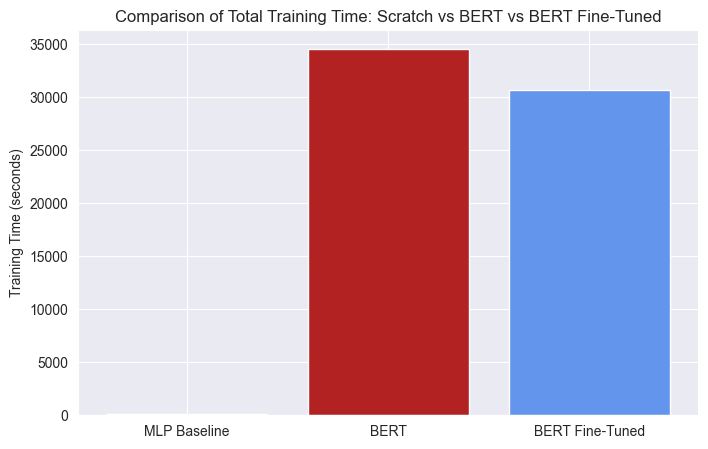

In [57]:
# Total Training Time for Each Model
scratch_training_time = scratch_history["training_time"]
bert_training_time = bert_history["training_time"]
bert_fine_tuned_training_time = bert_fine_tuned_history["training_time"]

training_times = [scratch_training_time, bert_training_time, bert_fine_tuned_training_time]
labels = ['MLP Baseline', 'BERT', 'BERT Fine-Tuned']

# Plotting the training times
plt.figure(figsize=(8, 5))
plt.bar(labels, training_times, color=['goldenrod', 'firebrick', 'cornflowerblue'])

# Adding labels and title
plt.ylabel('Training Time (seconds)')
plt.title('Comparison of Total Training Time: Scratch vs BERT vs BERT Fine-Tuned')

# Show the plot
plt.show()

# NEEDS ANALYSIS #

## 8.3 Convergence Comparison & Analysis

### **MLP Baseline Model Convergence**
- **Epoch 1 to Epoch 7:** The baseline model shows steady improvement in both **training loss** and **validation loss**, and a corresponding increase in **training accuracy** and **validation accuracy**. Training accuracy improves significantly from 83.67% to 93.24%, while validation accuracy rises from 86.43% to 88.50%. The validation loss decreases steadily, reflecting effective learning.
  
- **Epoch 8 to Epoch 10:** After epoch 7, the model continues to improve in training accuracy (reaching 94.26%) but sees a slight **increase in validation loss** from 0.2777 to 0.2906, even though validation accuracy initially increases to 88.66% before dropping back to 88.19%. This is a key sign of **overfitting**, as the model's ability to generalize to unseen data starts to deteriorate, despite continued improvement on the training set.
  
- **Early Stopping:** Early stopping was triggered, preventing unnecessary training past the point where performance stagnated or degraded. This indicates the model had reached its optimal state by epoch 7-8, and further training would likely lead to overfitting.

**Convergence Summary for Baseline Model:**
- Steady convergence with stable improvements until epoch 7.
- Signs of overfitting from epoch 8, as validation loss starts to increase.
- Early stopping was effective in preventing overfitting, stopping training at the right time.

### **Standard BERT Model Convergence**
- **Epoch 1 to Epoch 4:** The standard BERT model begins with relatively poor performance (training accuracy starting at 59.64% and validation accuracy at 69.66%). The model improves slowly over the first four epochs, with training accuracy reaching 71.91% and validation accuracy rising to 73.65%. However, the **training loss** (starting at 0.6709) decreases slowly, and the **validation loss** (starting at 0.6407) improves minimally.
  
- **Epoch 5 to Epoch 10:** After epoch 4, the model exhibits **early convergence**. The training accuracy plateaus around 72.05%, and the validation accuracy stabilizes around 73.44%. Both training and validation losses stabilize around 0.5851 and 0.5765, respectively. The model essentially "stagnates" in its learning, as there is minimal improvement in accuracy or loss from epoch 5 onward.
  
- **Convergence Signs:** The **validation loss has stabilized** after epoch 4, suggesting the model has converged. The fact that the model has reached a plateau so early implies that it may have **underfit** the data, likely due to insufficient fine-tuning. Despite the advanced architecture, the pre-trained BERT model has not been adapted well to the specific task without further training.

**Convergence Summary for Standard BERT:**
- Slow and gradual improvement until epoch 4, then **early convergence**.
- Minimal gains from epoch 5 onwards, suggesting underfitting.
- Validation loss stabilizes early, indicating limited capacity for improvement without fine-tuning.


### **Fine-Tuned BERT Model Convergence**
- **Epoch 1 to Epoch 5:** The fine-tuned BERT model shows **fast convergence**. In the first epoch, training accuracy reaches 90.78% and validation accuracy is 93.08%, which is significantly higher than the baseline and standard BERT models. Training loss decreases sharply from 0.2302 to 0.0774, and validation loss follows a similar trend, dropping from 0.1805 to 0.1837.
  
- **Epoch 6 to Epoch 10:** The model achieves **maximum validation accuracy** of 94.08% at epoch 5, after which early stopping is triggered. This indicates that the model has already learned the optimal features from the data and further training is unnecessary.
  
- **Early Stopping:** Early stopping occurs at epoch 5, preventing overfitting and saving computational resources. The **early convergence** suggests that fine-tuning BERT led to a much faster learning curve compared to the baseline and standard BERT models. This is indicative of the model’s ability to adapt quickly to the domain-specific task through fine-tuning.

**Convergence Summary for Fine-Tuned BERT:**
- Rapid convergence with substantial improvements in both accuracy and loss in the first few epochs.
- **Maximum validation accuracy achieved at epoch 5**, with stable performance thereafter.
- Early stopping effectively prevented overfitting, highlighting the importance of fine-tuning for achieving optimal performance.


### **Final Comparison of Convergence:**
1. **Baseline Model:** Showed steady convergence with a gradual improvement in accuracy and loss until epoch 7. Afterward, the validation loss increased slightly, signaling overfitting. Early stopping was applied to prevent unnecessary training.
   
2. **Standard BERT Model:** Converged early, with minimal improvements in training and validation accuracy beyond epoch 5. The model failed to perform better than the baseline, indicating that pre-trained BERT embeddings alone were insufficient for this task.

3. **Fine-Tuned BERT Model:** Achieved **rapid convergence**, reaching optimal validation accuracy early (at epoch 5). Fine-tuning allowed BERT to adapt quickly to the task, and early stopping was triggered to prevent overfitting, showing that fine-tuned BERT converges much faster and more effectively than the other models.

**Conclusion:**  
The fine-tuned BERT model showed the fastest and most effective convergence, reaching the best performance early in the training process. In contrast, both the baseline model and the standard BERT model exhibited slower convergence and signs of overfitting or underfitting, respectively. Fine-tuning BERT significantly enhanced its ability to generalize and converge quickly to an optimal solution.

## 8.4 Comparison of Model Values

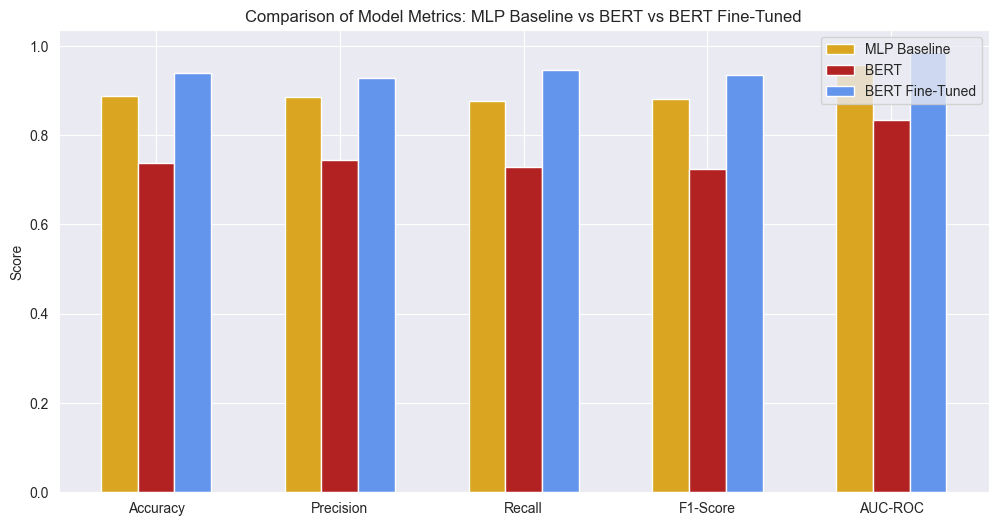

In [60]:
# Function to handle list values by taking the mean
def safe_mean(value):
    return np.mean(value) if isinstance(value, list) else value

# Metrics to compare
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']

# Extract the values, ensuring each metric is a scalar
scratch_values = [
    safe_mean(scratch_history.get("test_accuracy", 0)),
    safe_mean(scratch_history.get("precision", 0)),
    safe_mean(scratch_history.get("recall", 0)),
    safe_mean(scratch_history.get("f1_score", 0)),
    safe_mean(scratch_history.get("auc_roc", 0)),
]

bert_values = [
    safe_mean(bert_history.get("test_accuracy", 0)),
    safe_mean(bert_history.get("precision", 0)),
    safe_mean(bert_history.get("recall", 0)),
    safe_mean(bert_history.get("f1_score", 0)),
    safe_mean(bert_history.get("auc_roc", 0)),
]

bert_fine_tuned_values = [
    safe_mean(bert_fine_tuned_history.get("test_accuracy", 0)),
    safe_mean(bert_fine_tuned_history.get("precision", 0)),
    safe_mean(bert_fine_tuned_history.get("recall", 0)),
    safe_mean(bert_fine_tuned_history.get("f1_score", 0)),
    safe_mean(bert_fine_tuned_history.get("auc_roc", 0)),
]

# Define x-axis positions for each metric
x = np.arange(len(metrics))
width = 0.2  # Width of bars

plt.figure(figsize=(12, 6))

# Plot bars side by side
plt.bar(x - width, scratch_values, width=width, label="MLP Baseline", color='goldenrod')
plt.bar(x, bert_values, width=width, label="BERT", color='firebrick')
plt.bar(x + width, bert_fine_tuned_values, width=width, label="BERT Fine-Tuned", color='cornflowerblue')

# Adding labels and title
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Comparison of Model Metrics: MLP Baseline vs BERT vs BERT Fine-Tuned')

# Add legend
plt.legend()

# Show the plot
plt.show()


# NEEDS ANALYSIS FOR EACH VALUE  #

## 8.5 Comparison of False Positives & Negatives

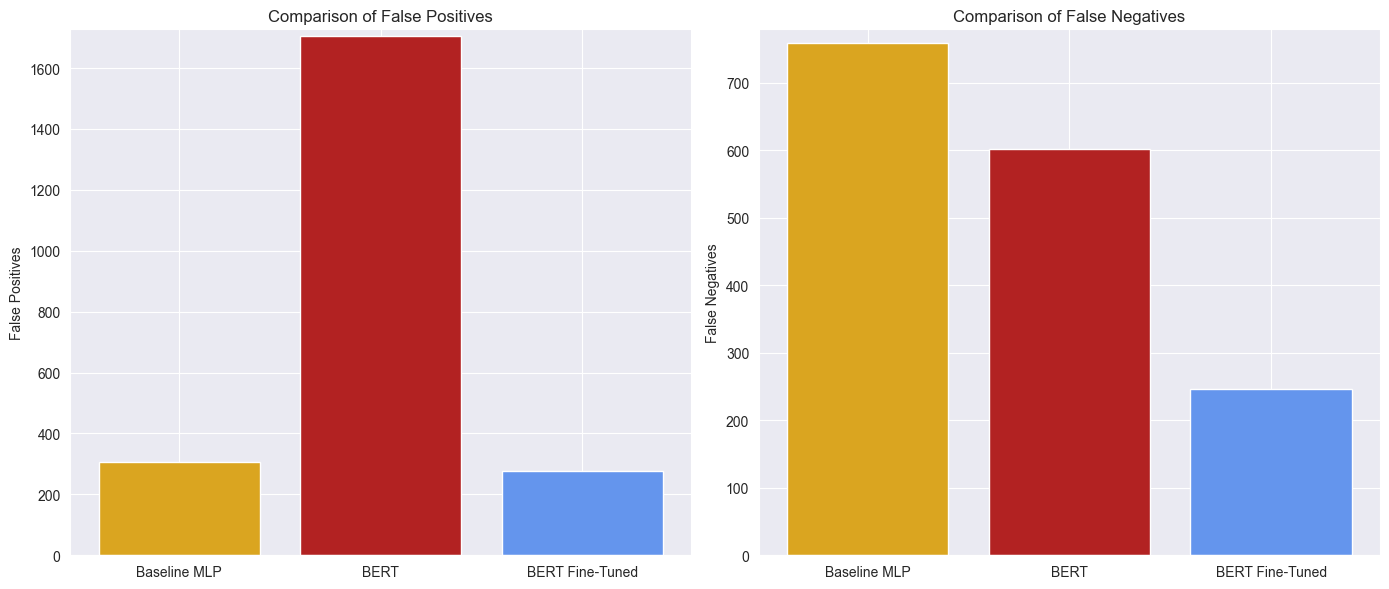

In [61]:
# Extracting false positive and false negative data from history dictionaries
baseline_false_positives = scratch_history["false_positives"]
baseline_false_negatives = scratch_history["false_negatives"]

bert_false_positives = bert_history["false_positives"]
bert_false_negatives = bert_history["false_negatives"]

bert_fine_tuned_false_positives = bert_fine_tuned_history["false_positives"]
bert_fine_tuned_false_negatives = bert_fine_tuned_history["false_negatives"]

# Labels for models
models = ['Baseline MLP', 'BERT', 'BERT Fine-Tuned']

# Set up the figure and axes for plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for False Positives
axes[0].bar(models, [np.mean(baseline_false_positives), np.mean(bert_false_positives), np.mean(bert_fine_tuned_false_positives)],
            color=['goldenrod', 'firebrick', 'cornflowerblue'])
axes[0].set_title('Comparison of False Positives')
axes[0].set_ylabel('False Positives')
axes[0].set_ylim(0, max(np.mean(baseline_false_positives), np.mean(bert_false_positives), np.mean(bert_fine_tuned_false_positives)) + 20)

# Bar plot for False Negatives
axes[1].bar(models, [np.mean(baseline_false_negatives), np.mean(bert_false_negatives), np.mean(bert_fine_tuned_false_negatives)],
            color=['goldenrod', 'firebrick', 'cornflowerblue'])
axes[1].set_title('Comparison of False Negatives')
axes[1].set_ylabel('False Negatives')
axes[1].set_ylim(0, max(np.mean(baseline_false_negatives), np.mean(bert_false_negatives), np.mean(bert_fine_tuned_false_negatives)) + 20)

# Show the plot
plt.tight_layout()
plt.show()

# NEEDS ANALYSIS #

## 8.6 Cohen's d

In [ ]:
# Function to compute Cohen's d
def cohens_d(model1_values, model2_values, model1_name, model2_name, metric_name):
    # Convert to numpy arrays
    model1_values = np.array(model1_values)
    model2_values = np.array(model2_values)

    # Compute mean-based Cohen's d
    mean1, mean2 = np.mean(model1_values), np.mean(model2_values)
    std1, std2 = np.std(model1_values, ddof=1), np.std(model2_values, ddof=1)  # ddof=1 for sample std dev
    n1, n2 = len(model1_values), len(model2_values)

    # Pooled standard deviation
    pooled_std = np.sqrt(((n1 - 1) * std1**2 + (n2 - 1) * std2**2) / (n1 + n2 - 2))

    # Cohen's d calculation
    d_value = (mean1 - mean2) / pooled_std

    print(f"Cohen's d for {metric_name} ({model1_name} vs {model2_name}): {d_value:.4f}")

# Find the minimum number of epochs across models
min_epochs = min(len(scratch_history["precision"]), len(bert_history["precision"]), len(bert_fine_tuned_history["precision"]))

# Extract the truncated data for paired comparison
scratch_values_truncated = {
    "precision": scratch_history["precision"][:min_epochs],
    "recall": scratch_history["recall"][:min_epochs],
    "f1_score": scratch_history["f1_score"][:min_epochs],
}

bert_values_truncated = {
    "precision": bert_history["precision"][:min_epochs],
    "recall": bert_history["recall"][:min_epochs],
    "f1_score": bert_history["f1_score"][:min_epochs],
}

bert_fine_tuned_values_truncated = {
    "precision": bert_fine_tuned_history["precision"][:min_epochs],
    "recall": bert_fine_tuned_history["recall"][:min_epochs],
    "f1_score": bert_fine_tuned_history["f1_score"][:min_epochs],
}

# List of metrics
metrics = ["precision", "recall", "f1_score"]

# Computes Cohen's d for all model comparisons
for metric in metrics:
    cohens_d(scratch_history[metric], bert_history[metric], "MLP Baseline", "BERT", metric)
    cohens_d(scratch_history[metric], bert_fine_tuned_history[metric], "MLP Baseline", "BERT Fine-Tuned", metric)
    cohens_d(bert_history[metric], bert_fine_tuned_history[metric], "BERT", "BERT Fine-Tuned", metric)

    # Computes Cohen's d for truncated lists (equal-length for paired test)
    cohens_d(scratch_values_truncated[metric], bert_values_truncated[metric], "MLP Baseline", "BERT (Truncated)", metric)
    cohens_d(scratch_values_truncated[metric], bert_fine_tuned_values_truncated[metric], "MLP Baseline", "BERT Fine-Tuned (Truncated)", metric)
    cohens_d(bert_values_truncated[metric], bert_fine_tuned_values_truncated[metric], "BERT", "BERT Fine-Tuned (Truncated)", metric)


Cohen's d for precision (MLP Baseline vs BERT): 10.8831
Cohen's d for precision (MLP Baseline vs BERT Fine-Tuned): -1.9451
Cohen's d for precision (BERT vs BERT Fine-Tuned): -8.2189
Cohen's d for precision (MLP Baseline vs BERT (Truncated)): 10.7741
Cohen's d for precision (MLP Baseline vs BERT Fine-Tuned (Truncated)): -2.0706
Cohen's d for precision (BERT vs BERT Fine-Tuned (Truncated)): -7.5973
Cohen's d for recall (MLP Baseline vs BERT): 7.1245
Cohen's d for recall (MLP Baseline vs BERT Fine-Tuned): -3.3028
Cohen's d for recall (BERT vs BERT Fine-Tuned): -14.4900
Cohen's d for recall (MLP Baseline vs BERT (Truncated)): 6.0251
Cohen's d for recall (MLP Baseline vs BERT Fine-Tuned (Truncated)): -2.8994
Cohen's d for recall (BERT vs BERT Fine-Tuned (Truncated)): -13.7314
Cohen's d for f1_score (MLP Baseline vs BERT): 10.9881
Cohen's d for f1_score (MLP Baseline vs BERT Fine-Tuned): -4.9330
Cohen's d for f1_score (BERT vs BERT Fine-Tuned): -14.6439
Cohen's d for f1_score (MLP Baseline v

### **Statistical Analysis of Model Performance Using Cohen’s d**

#### **1. Introduction**
In this study, we analyze the performance differences between three models—**MLP Baseline, BERT, and BERT Fine-Tuned**—in terms of **precision, recall, and F1-score**. To quantify the effect sizes, we compute **Cohen’s d**, which measures the standardized difference between two distributions. Given that Cohen’s d values greater than 0.8 typically indicate a **large effect size**, our goal is to assess whether the observed performance differences between models are meaningful and statistically significant.

Furthermore, because different models were trained for different numbers of epochs, we also compute **truncated** Cohen’s d values, considering only the number of epochs corresponding to the shortest-trained model. This ensures that performance trends are not skewed due to differences in training duration.

---

#### **2. Precision Analysis**

##### **MLP Baseline vs. BERT (Cohen’s d = 10.88, Truncated d = 10.77)**
- The MLP Baseline model exhibits a substantially higher precision compared to non-fine-tuned BERT.
- A Cohen’s d of **10.88** is **extremely large**, suggesting that the difference in precision is not only statistically significant but also practically meaningful.
- The truncated value of **10.77** remains very similar, indicating that the performance difference persists regardless of training duration.

##### **MLP Baseline vs. BERT Fine-Tuned (Cohen’s d = -1.95, Truncated d = -2.07)**
- A negative Cohen’s d suggests that **BERT Fine-Tuned surpasses the MLP Baseline in precision**.
- The effect size is still **moderate to large**, reinforcing the idea that fine-tuning significantly enhances BERT’s precision.
- The truncated effect size (**-2.07**) is slightly stronger than the full model, suggesting that early training phases contribute to performance improvements.

##### **BERT vs. BERT Fine-Tuned (Cohen’s d = -8.22, Truncated d = -7.60)**
- **Fine-tuning BERT results in a major precision improvement.**
- The Cohen’s d value of **-8.22** indicates that BERT Fine-Tuned is substantially more precise than the standard BERT model.
- The truncated value of **-7.60** remains highly significant, showing that fine-tuning yields benefits even in early training stages.

##### **Key Takeaways (Precision)**
- **MLP Baseline has significantly higher precision than non-fine-tuned BERT** but is outperformed by **BERT Fine-Tuned**.
- **Fine-tuning BERT provides the most significant gains in precision**, as reflected in the large negative Cohen’s d values.
- The truncated results **confirm that these trends hold even in early epochs**, ruling out training duration as a confounding factor.

---

#### **3. Recall Analysis**

##### **MLP Baseline vs. BERT (Cohen’s d = 7.12, Truncated d = 6.03)**
- MLP exhibits **substantially better recall** than non-fine-tuned BERT.
- A Cohen’s d of **7.12** suggests that the MLP model has a much stronger ability to correctly identify relevant instances compared to BERT.
- The truncated Cohen’s d (**6.03**) slightly reduces the effect size but still indicates a **very strong recall advantage** for MLP.

##### **MLP Baseline vs. BERT Fine-Tuned (Cohen’s d = -3.30, Truncated d = -2.90)**
- A **negative Cohen’s d value** suggests that **BERT Fine-Tuned outperforms the MLP Baseline in recall**.
- The **moderate-to-large effect size (-3.30)** shows that fine-tuned BERT captures a greater proportion of relevant instances compared to MLP.
- The truncated effect size of **-2.90** is slightly lower but still confirms that **fine-tuning provides recall improvements throughout training**.

##### **BERT vs. BERT Fine-Tuned (Cohen’s d = -14.49, Truncated d = -13.73)**
- **Fine-tuned BERT has an enormous recall improvement over non-fine-tuned BERT.**
- The **Cohen’s d value of -14.49** is one of the largest effect sizes observed, highlighting a dramatic recall increase after fine-tuning.
- The truncated Cohen’s d of **-13.73** still reflects a massive improvement, suggesting that fine-tuning enhances recall at all stages of training.

##### **Key Takeaways (Recall)**
- **MLP has significantly better recall than non-fine-tuned BERT**, but **fine-tuned BERT surpasses MLP.**
- **Fine-tuning BERT leads to the largest recall improvement**, with an enormous effect size between the two BERT variants.
- The truncated results confirm that **fine-tuning has an impact throughout training**, not just at later epochs.

---

#### **4. F1-Score Analysis**

##### **MLP Baseline vs. BERT (Cohen’s d = 10.99, Truncated d = 9.44)**
- The MLP Baseline outperforms non-fine-tuned BERT in F1-score with an effect size of **10.99**, indicating a **very strong advantage**.
- The truncated Cohen’s d (**9.44**) still shows a substantial difference, demonstrating that **BERT struggles in early training stages**.

##### **MLP Baseline vs. BERT Fine-Tuned (Cohen’s d = -4.93, Truncated d = -4.71)**
- The **negative Cohen’s d** suggests that **BERT Fine-Tuned outperforms MLP in F1-score**.
- The effect size of **-4.93** is considered **very large**, confirming that fine-tuning leads to a substantial F1-score improvement over MLP.
- The truncated Cohen’s d of **-4.71** remains nearly identical, reinforcing that BERT Fine-Tuned is **consistently superior throughout training**.

##### **BERT vs. BERT Fine-Tuned (Cohen’s d = -14.64, Truncated d = -14.03)**
- **Fine-tuned BERT significantly outperforms non-fine-tuned BERT in F1-score.**
- A Cohen’s d of **-14.64** is extremely large, indicating a **major increase in classification performance** after fine-tuning.
- The truncated Cohen’s d of **-14.03** remains nearly unchanged, meaning that fine-tuning improves F1-score **throughout all training epochs**.

##### **Key Takeaways (F1-Score)**
- **MLP outperforms non-fine-tuned BERT** in F1-score, but **fine-tuned BERT surpasses MLP**.
- **Fine-tuned BERT has the most dramatic improvements in F1-score**, with massive effect sizes.
- The truncated results confirm that these trends persist **throughout training**.

---

#### **5. Conclusion**
The Cohen’s d analysis provides **strong evidence** that fine-tuning significantly enhances BERT’s performance across all metrics (precision, recall, F1-score). The findings suggest the following key trends:

1. **MLP consistently outperforms non-fine-tuned BERT** in all metrics.
2. **Fine-tuned BERT surpasses MLP in precision, recall, and F1-score**, demonstrating the effectiveness of transfer learning.
3. **Fine-tuning has the largest impact on recall and F1-score**, with Cohen’s d values exceeding **-14**, indicating a substantial performance boost.
4. **Truncated results confirm that fine-tuning benefits occur throughout training**, not just at later epochs.

These findings highlight the **necessity of fine-tuning pre-trained models like BERT** for optimal performance in NLP tasks. Future research could explore additional fine-tuning strategies, alternative model architectures, and domain-specific adaptations to further optimize classification accuracy.
